In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crater Counting Lab
## Practice curves

In [2]:
def func(x):
    return x**3 + 3.*x**2 + 1000.

In [3]:
xx = np.linspace(0., 500., 1000)
yy = func(xx)

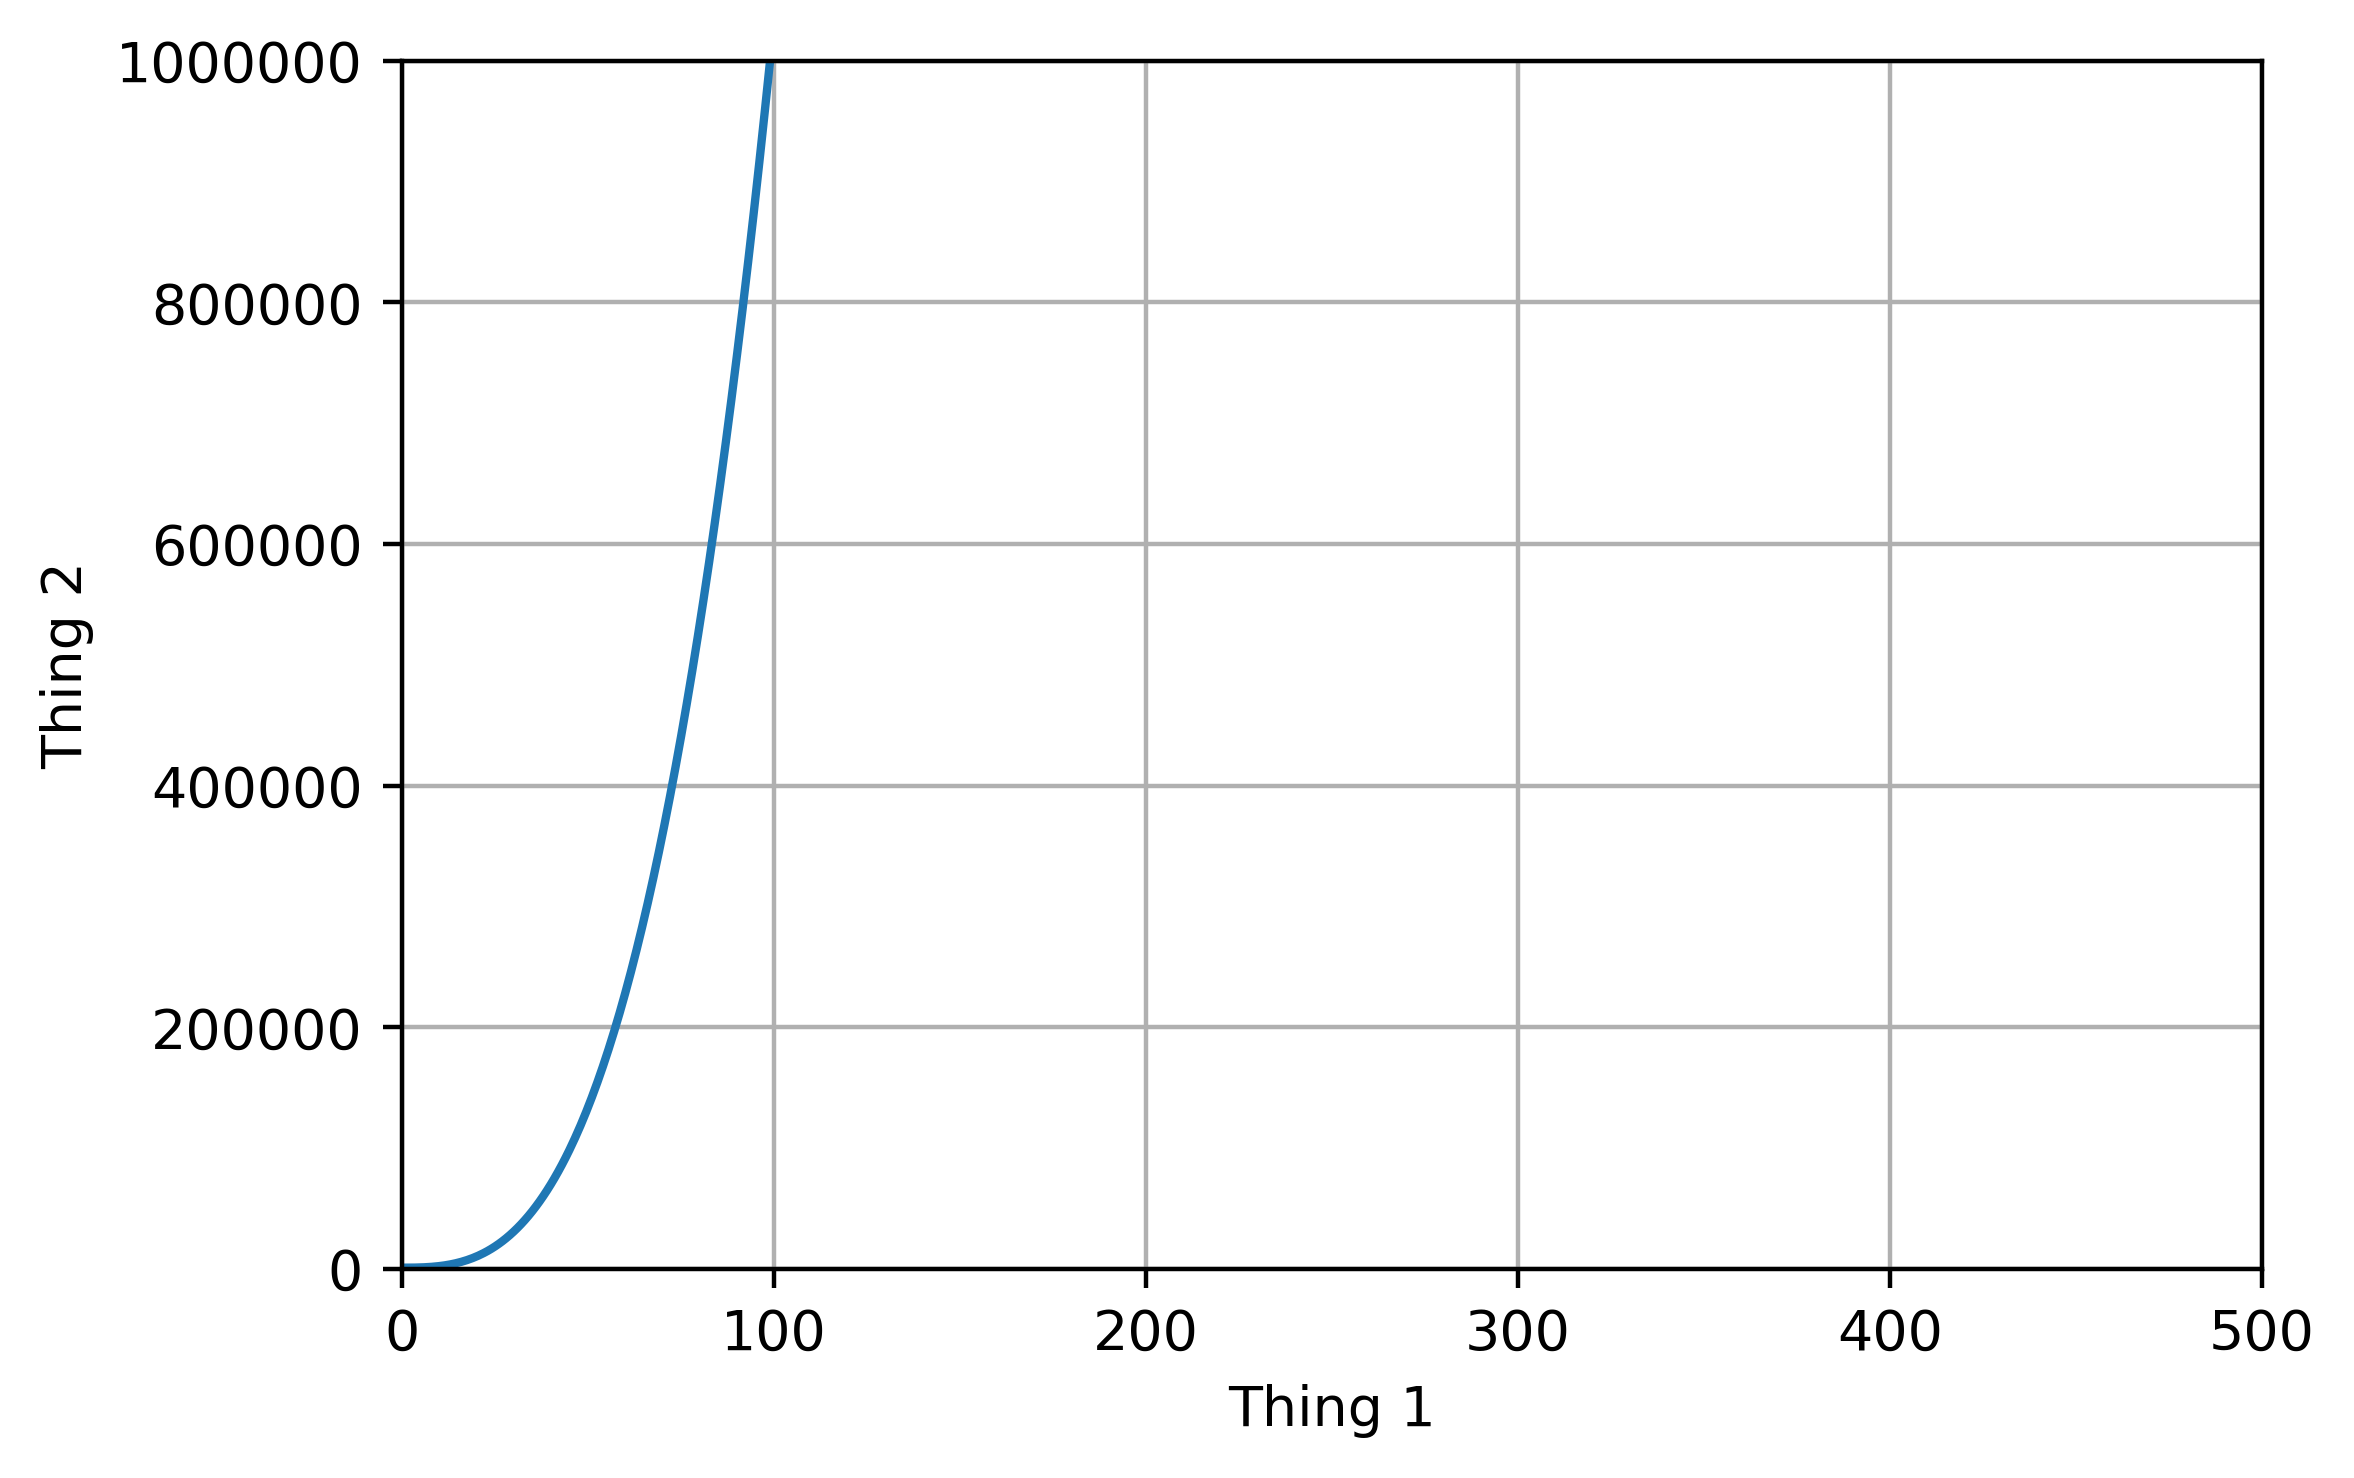

In [4]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.plot(xx, yy)
ax.grid(which='both', axis='both')
ax.ticklabel_format(scilimits=(-1, 7))
ax.set_xlim(0., 500.)
ax.set_ylim(0., 1.0e6)
ax.set_xlabel('Thing 1')
ax.set_ylabel('Thing 2');

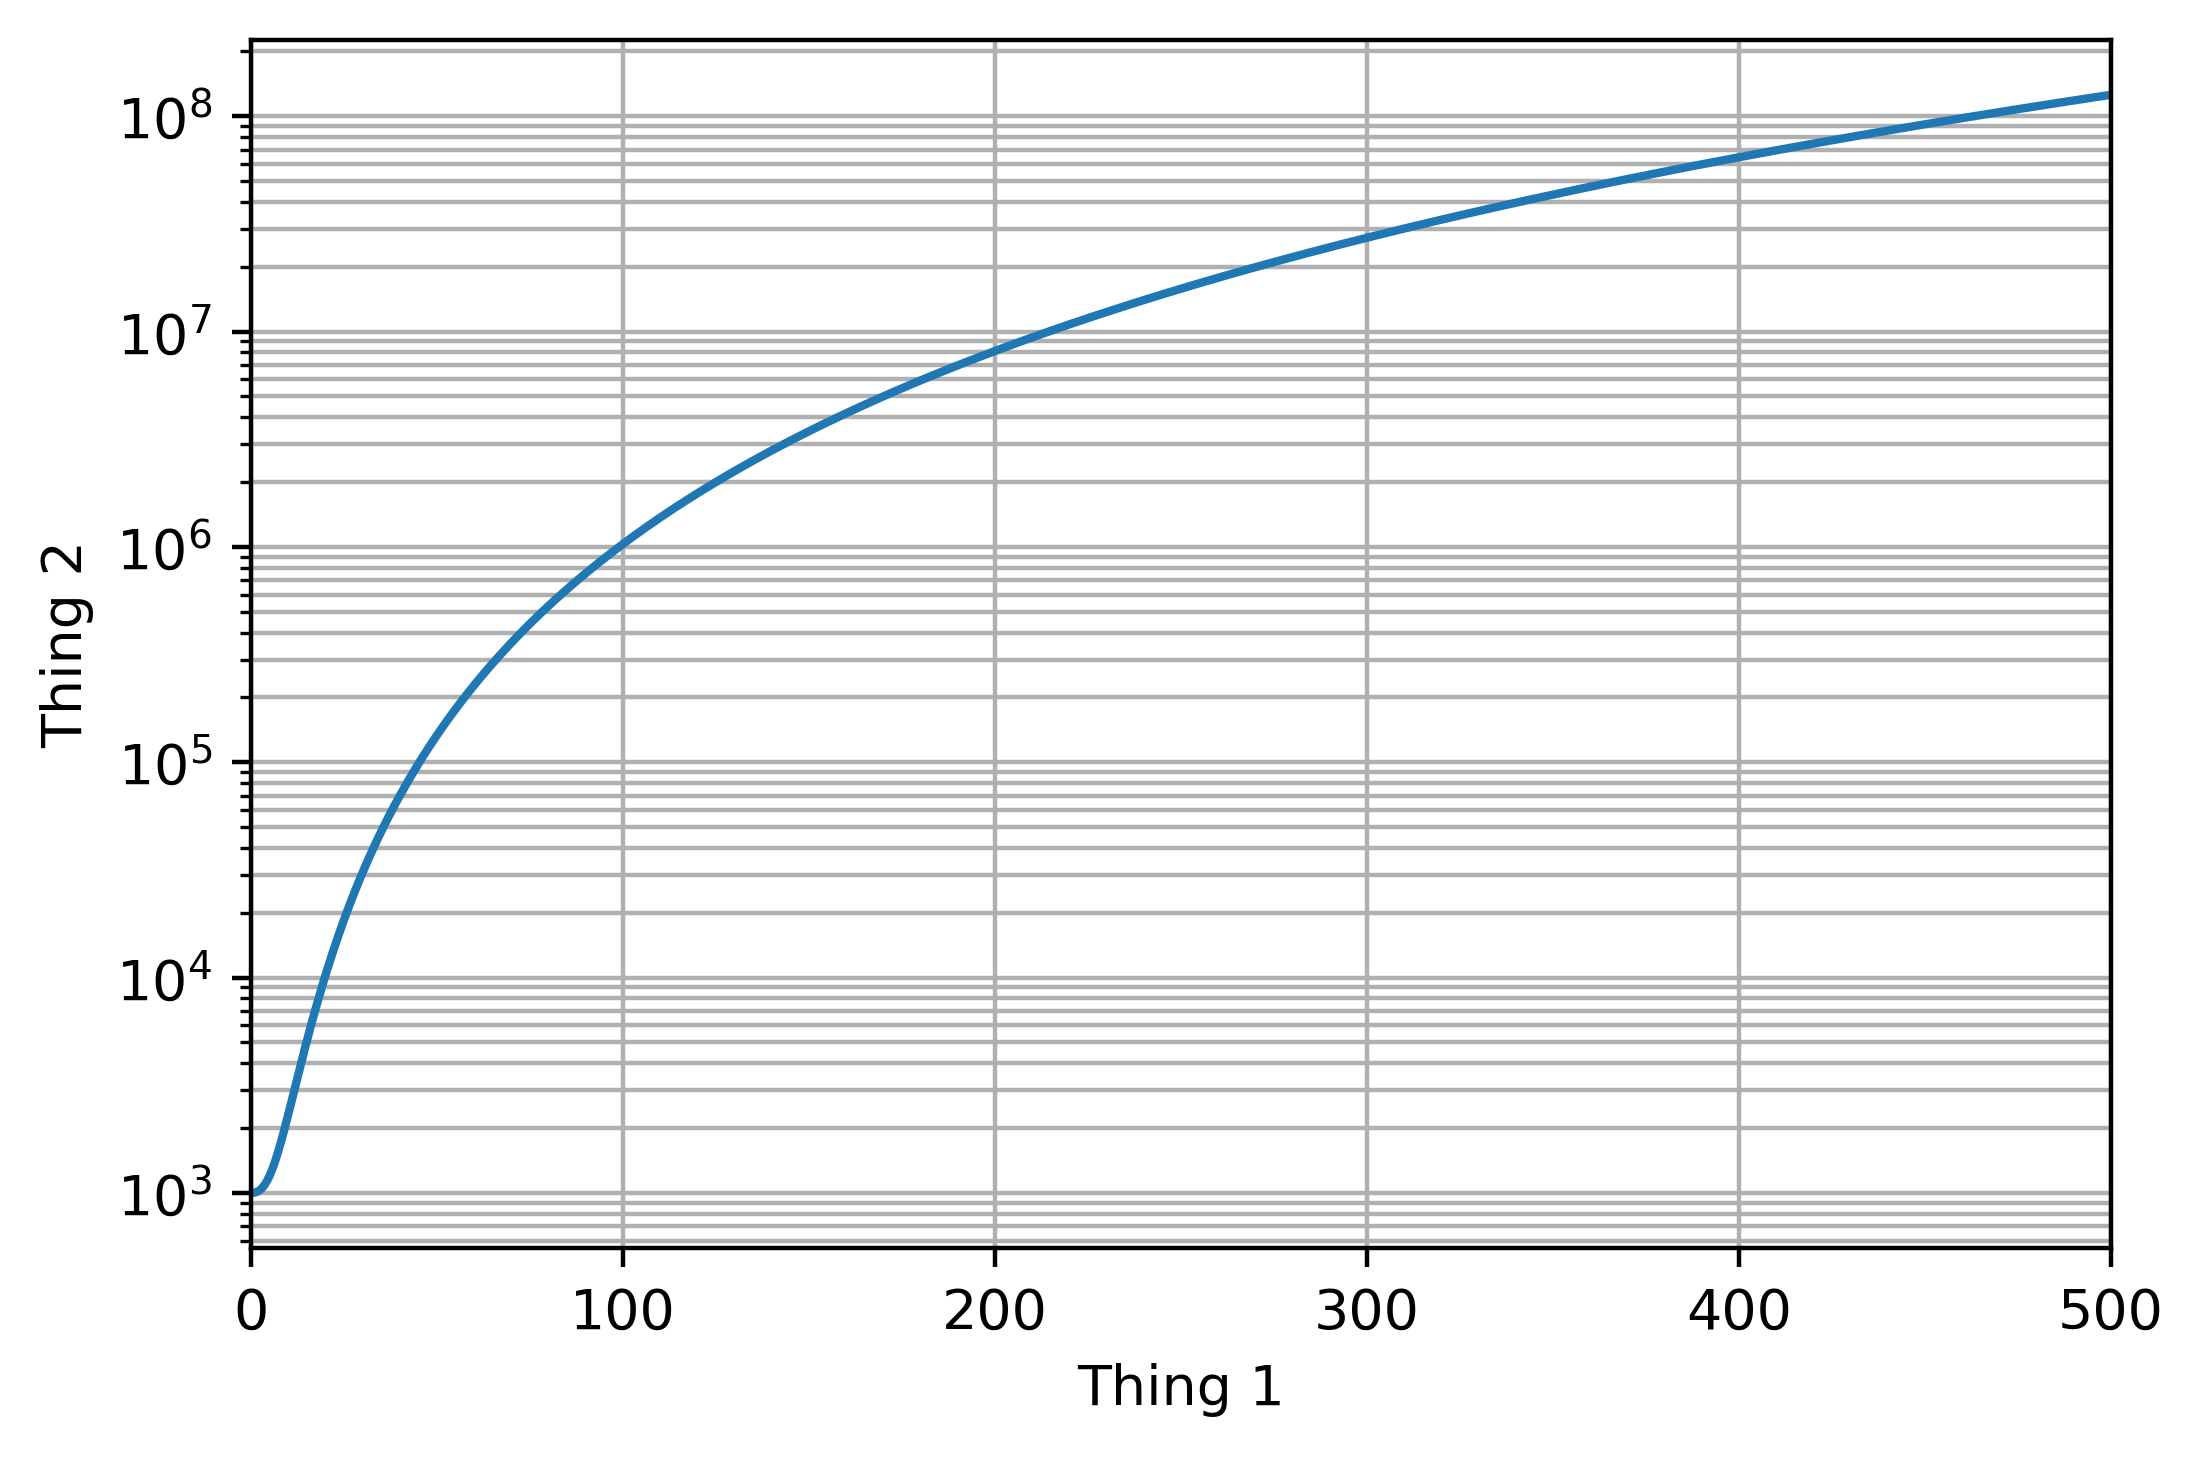

In [5]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.semilogy(xx, yy)
ax.grid(which='both', axis='both')
ax.set_xlim(0., 500.)
ax.set_xlabel('Thing 1')
ax.set_ylabel('Thing 2');

## The $R$ plot

In [6]:
def fake_mare_R(d):
    return -0.1 * np.log(d + 1.) + 0.7

def fake_high_R(d):
    return 0.1 * (np.log(d + 50.) + np.sin(np.pi/500. * d))

In [7]:
crater_D = np.linspace(0, 1000, 1000)
mare_R = fake_mare_R(crater_D)
high_R = fake_high_R(crater_D)

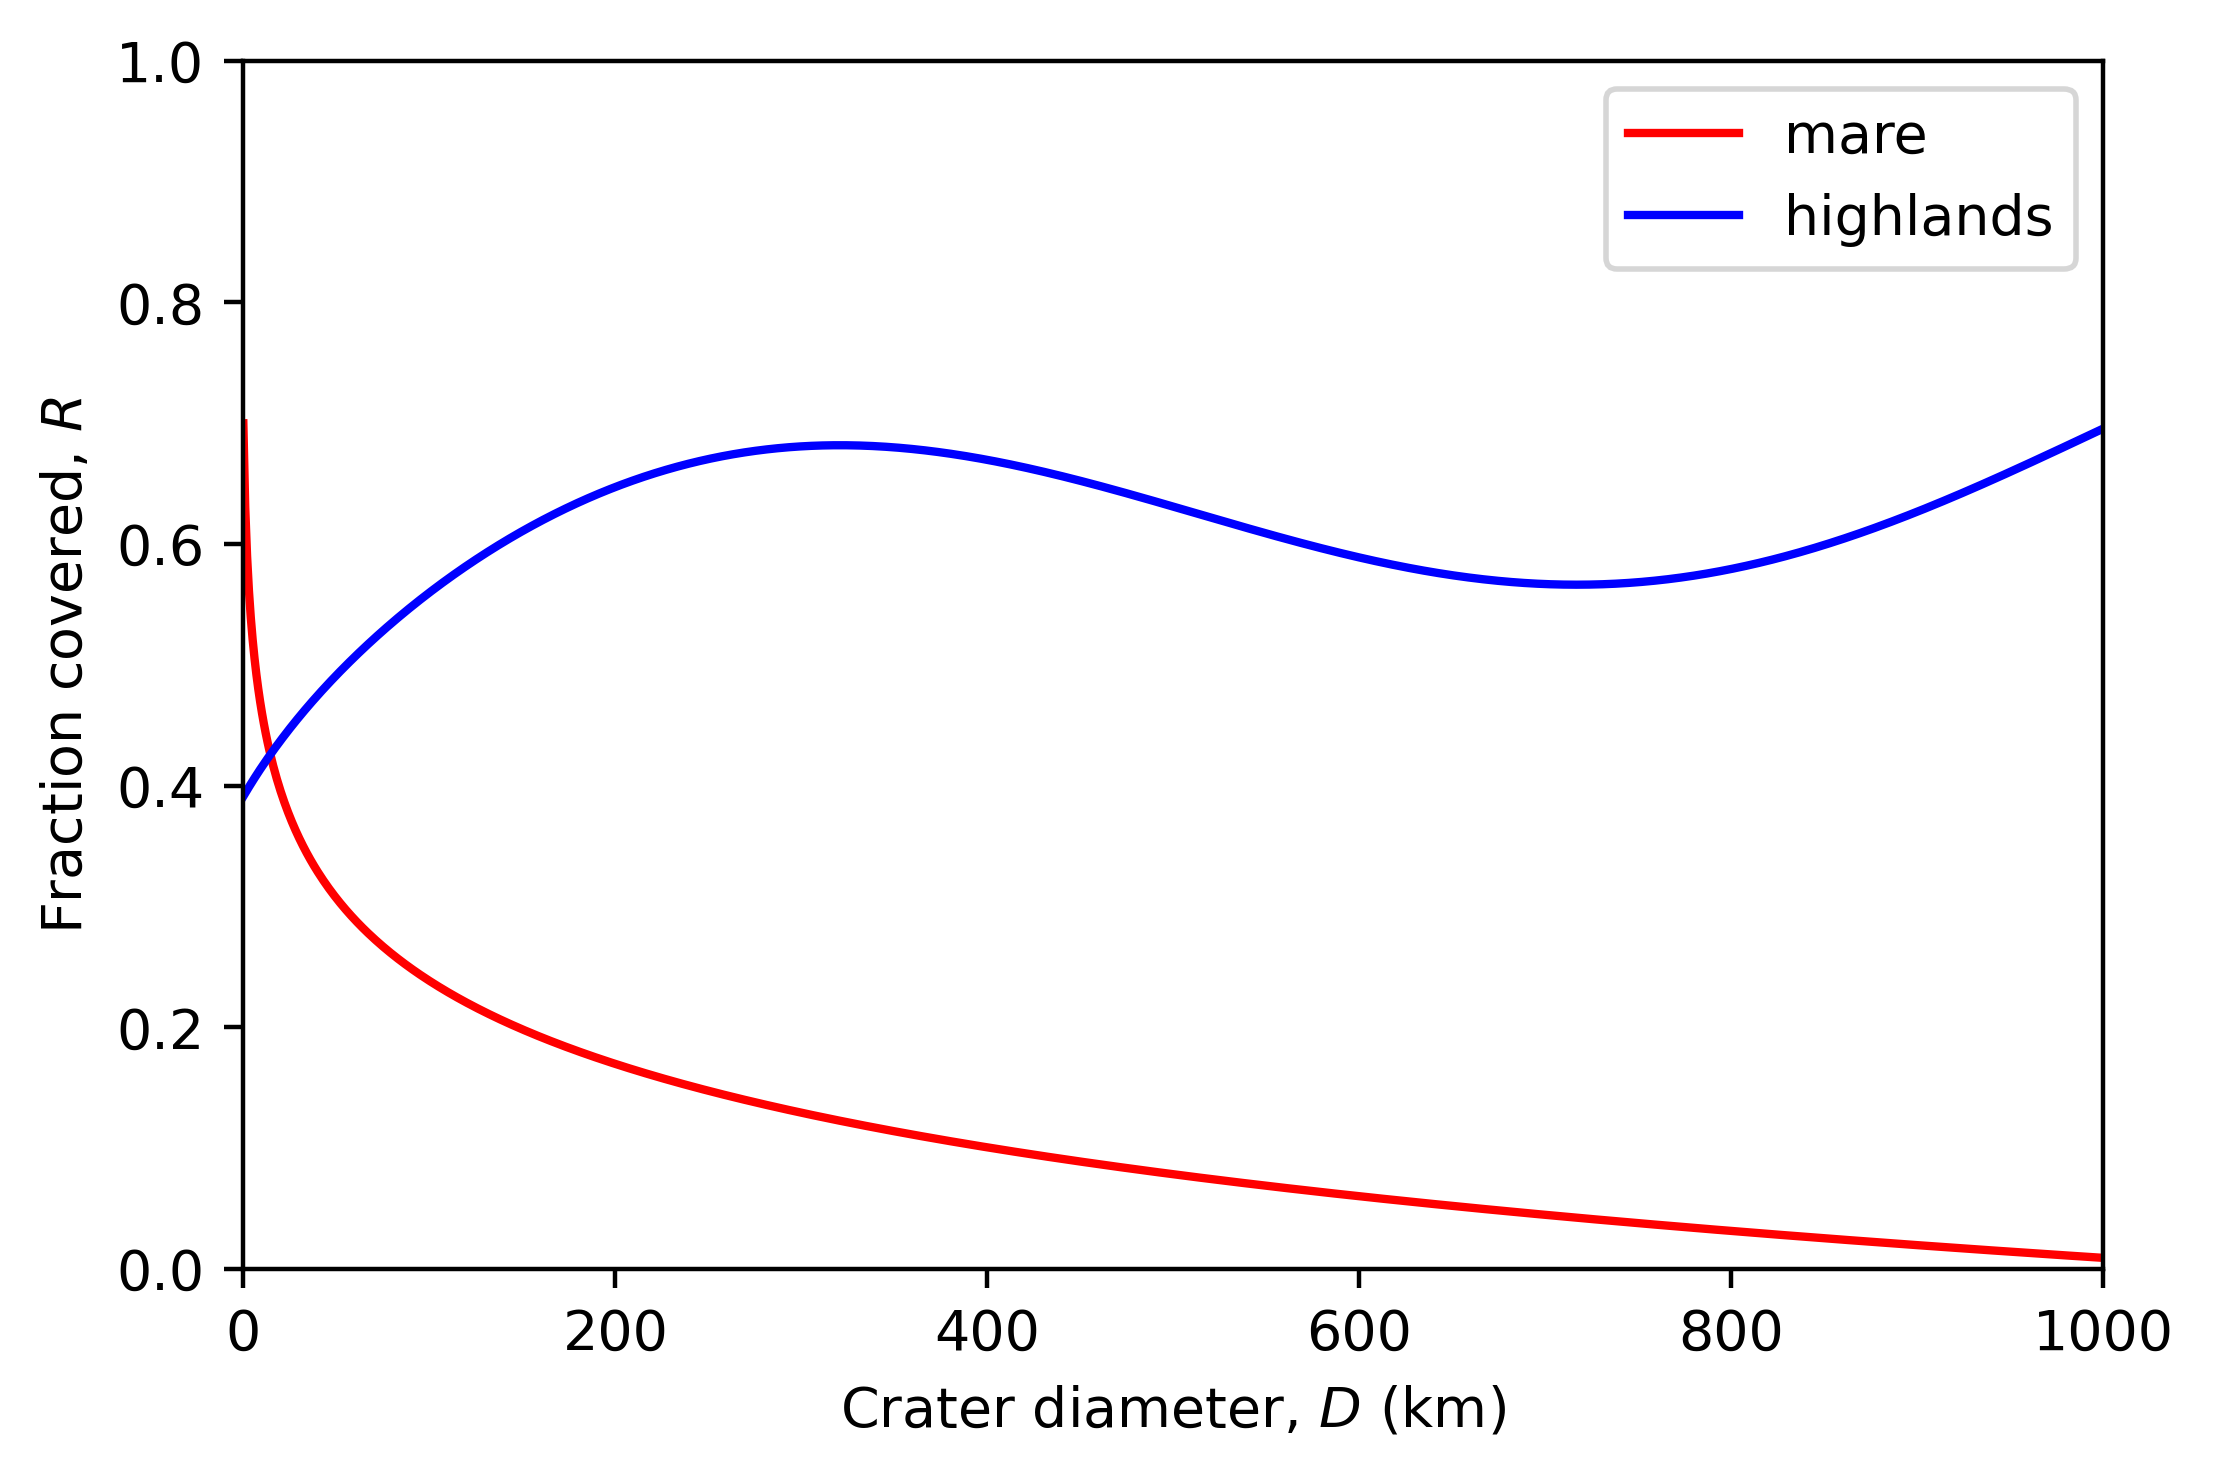

In [8]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.plot(crater_D, mare_R, c='r', label='mare')
ax.plot(crater_D, high_R, c='b', label='highlands')
ax.set_xlim(0., 1000.)
ax.set_ylim(0., 1.)
ax.set_xlabel(r'Crater diameter, $D$ (km)')
ax.set_ylabel(r'Fraction covered, $R$')
ax.legend(loc=0);

## The $N(10)$ plot

In [9]:
ages = np.linspace(0., 5., 1000)

arr = [(0., 0.1), (0.2, 1.), (0.6, 6.), (1., 10.), (2., 15.), (3., 20.), (3.3, 35.), (3.6, 100.), (4., 1000.), (4.4, 10000.)]
ages = [a for a, _ in arr]
fn10 = [n for _, n in arr]

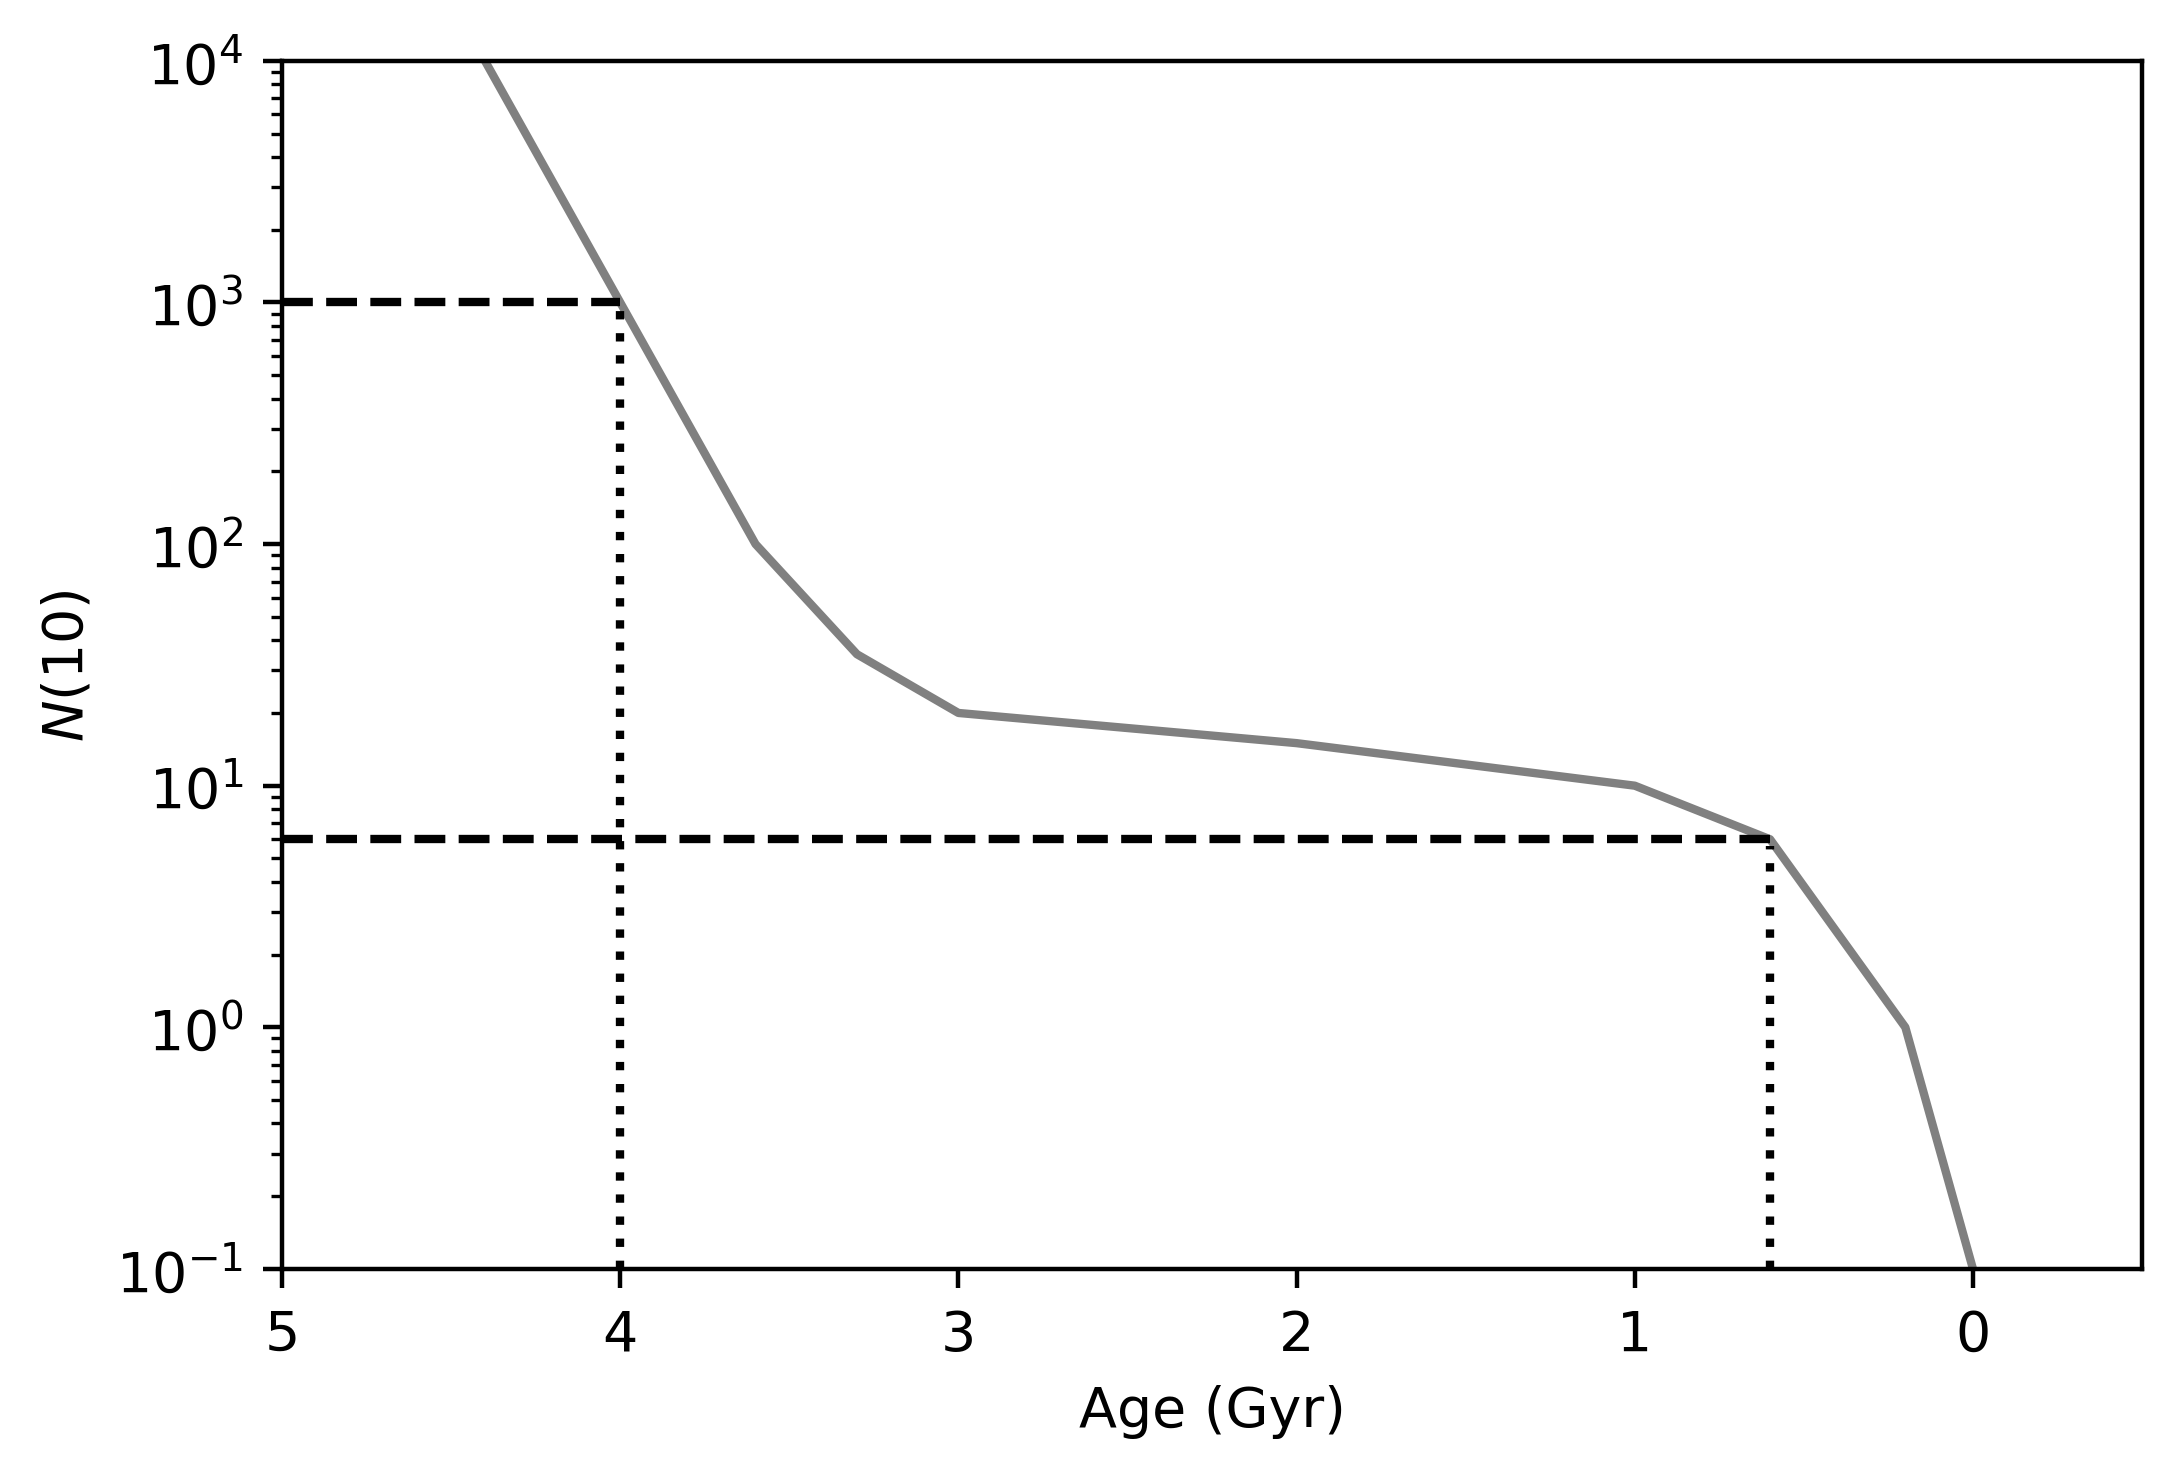

In [10]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.semilogy(ages, fn10, c='gray')
ax.axhline(1000., xmax=0.1818, c='k', ls='--')
ax.axvline(4., ymax=0.8, c='k', ls=':')
ax.axhline(6., xmax=0.8, c='k', ls='--')
ax.axvline(0.6, ymax=0.35, c='k', ls=':')
ax.set_xlim(5., -0.5)
ax.set_ylim(0.1, 10000.)
ax.set_xlabel(r'Age (Gyr)')
ax.set_ylabel(r'$N(10)$');

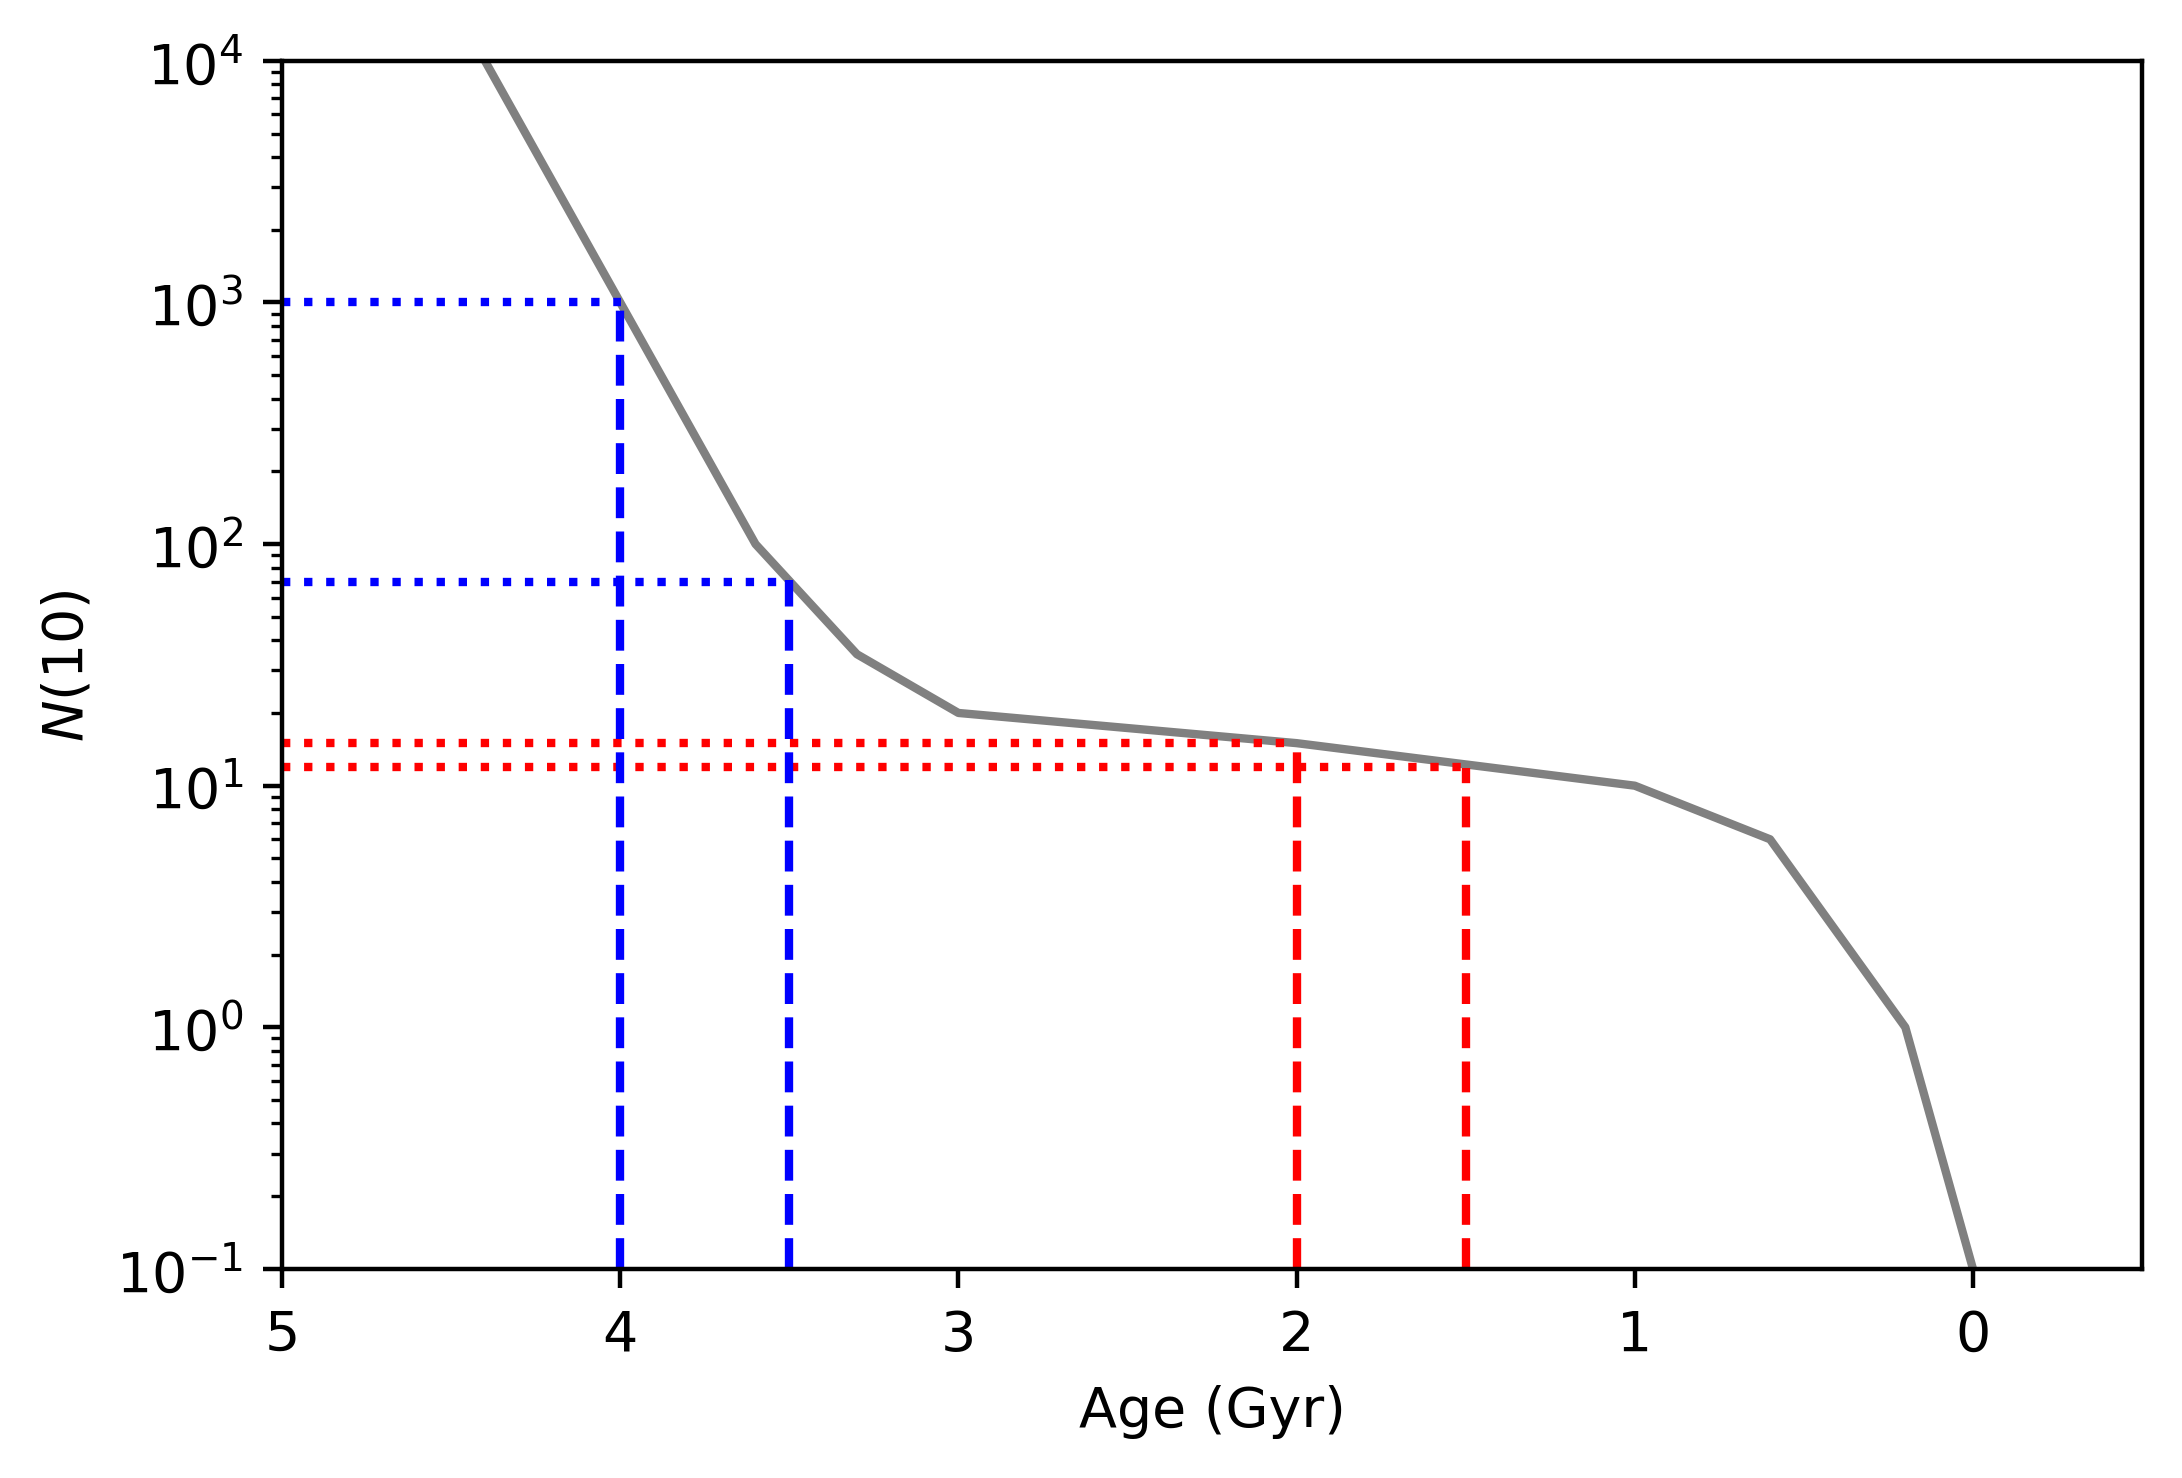

In [11]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.semilogy(ages, fn10, c='gray')

ax.axvline(1.5, ymax=0.415, c='r', ls='--')
ax.axhline(12., xmax=0.636, c='r', ls=':')

ax.axvline(2., ymax=0.43, c='r', ls='--')
ax.axhline(15., xmax=0.545, c='r', ls=':')

ax.axvline(3.5, ymax=0.57, c='b', ls='--')
ax.axhline(70., xmax=0.273, c='b', ls=':')

ax.axvline(4., ymax=0.8, c='b', ls='--')
ax.axhline(1000., xmax=0.182, c='b', ls=':')

ax.set_xlim(5., -0.5)
ax.set_ylim(0.1, 10000.)
ax.set_xlabel(r'Age (Gyr)')
ax.set_ylabel(r'$N(10)$');

# Exoplanet Transits Lab

## Exoplanet demographics

In [12]:
import pandas as pd
from astropy import units as u, constants as const
from seaborn import color_palette
from PyAstronomy.pyasl import NasaExoplanetArchive

In [13]:
nexa = NasaExoplanetArchive()

In [14]:
nexa.availableColumns()

Column        Description                          Unit 
--------------------------------------------------------
hostname      Name of host star                         
pl_name       Name of the planet                        
pl_letter     Planet letter (e.g., b, c, d, etc.)       
ra            Right ascension                      deg  
dec           Declination                          deg  
pl_orbper     Planetary orbital period             d    
pl_massj      Planetary mass                       MJ   
pl_radj       Planetary radius                     RJ   
pl_trandep    Central depth of transit             %    
pl_trandur    Transit duration                     d    
pl_tranmid    Transit midpoint                     BJD  
pl_orbsmax    Semi-major-axis                      AU   
pl_orbincl    Orbital inclination of planet        deg  
st_rad        Stellar radii                        Solar
sy_dist       Distance to star                     pc   
st_mass       Stellar mass     

['hostname',
 'pl_name',
 'pl_letter',
 'ra',
 'dec',
 'pl_orbper',
 'pl_massj',
 'pl_radj',
 'pl_trandep',
 'pl_trandur',
 'pl_tranmid',
 'pl_orbsmax',
 'pl_orbincl',
 'st_rad',
 'sy_dist',
 'st_mass',
 'st_teff',
 'st_logg',
 'sy_vmag',
 'st_vsin',
 'sy_kmag']

In [15]:
dat = nexa.getAllData()

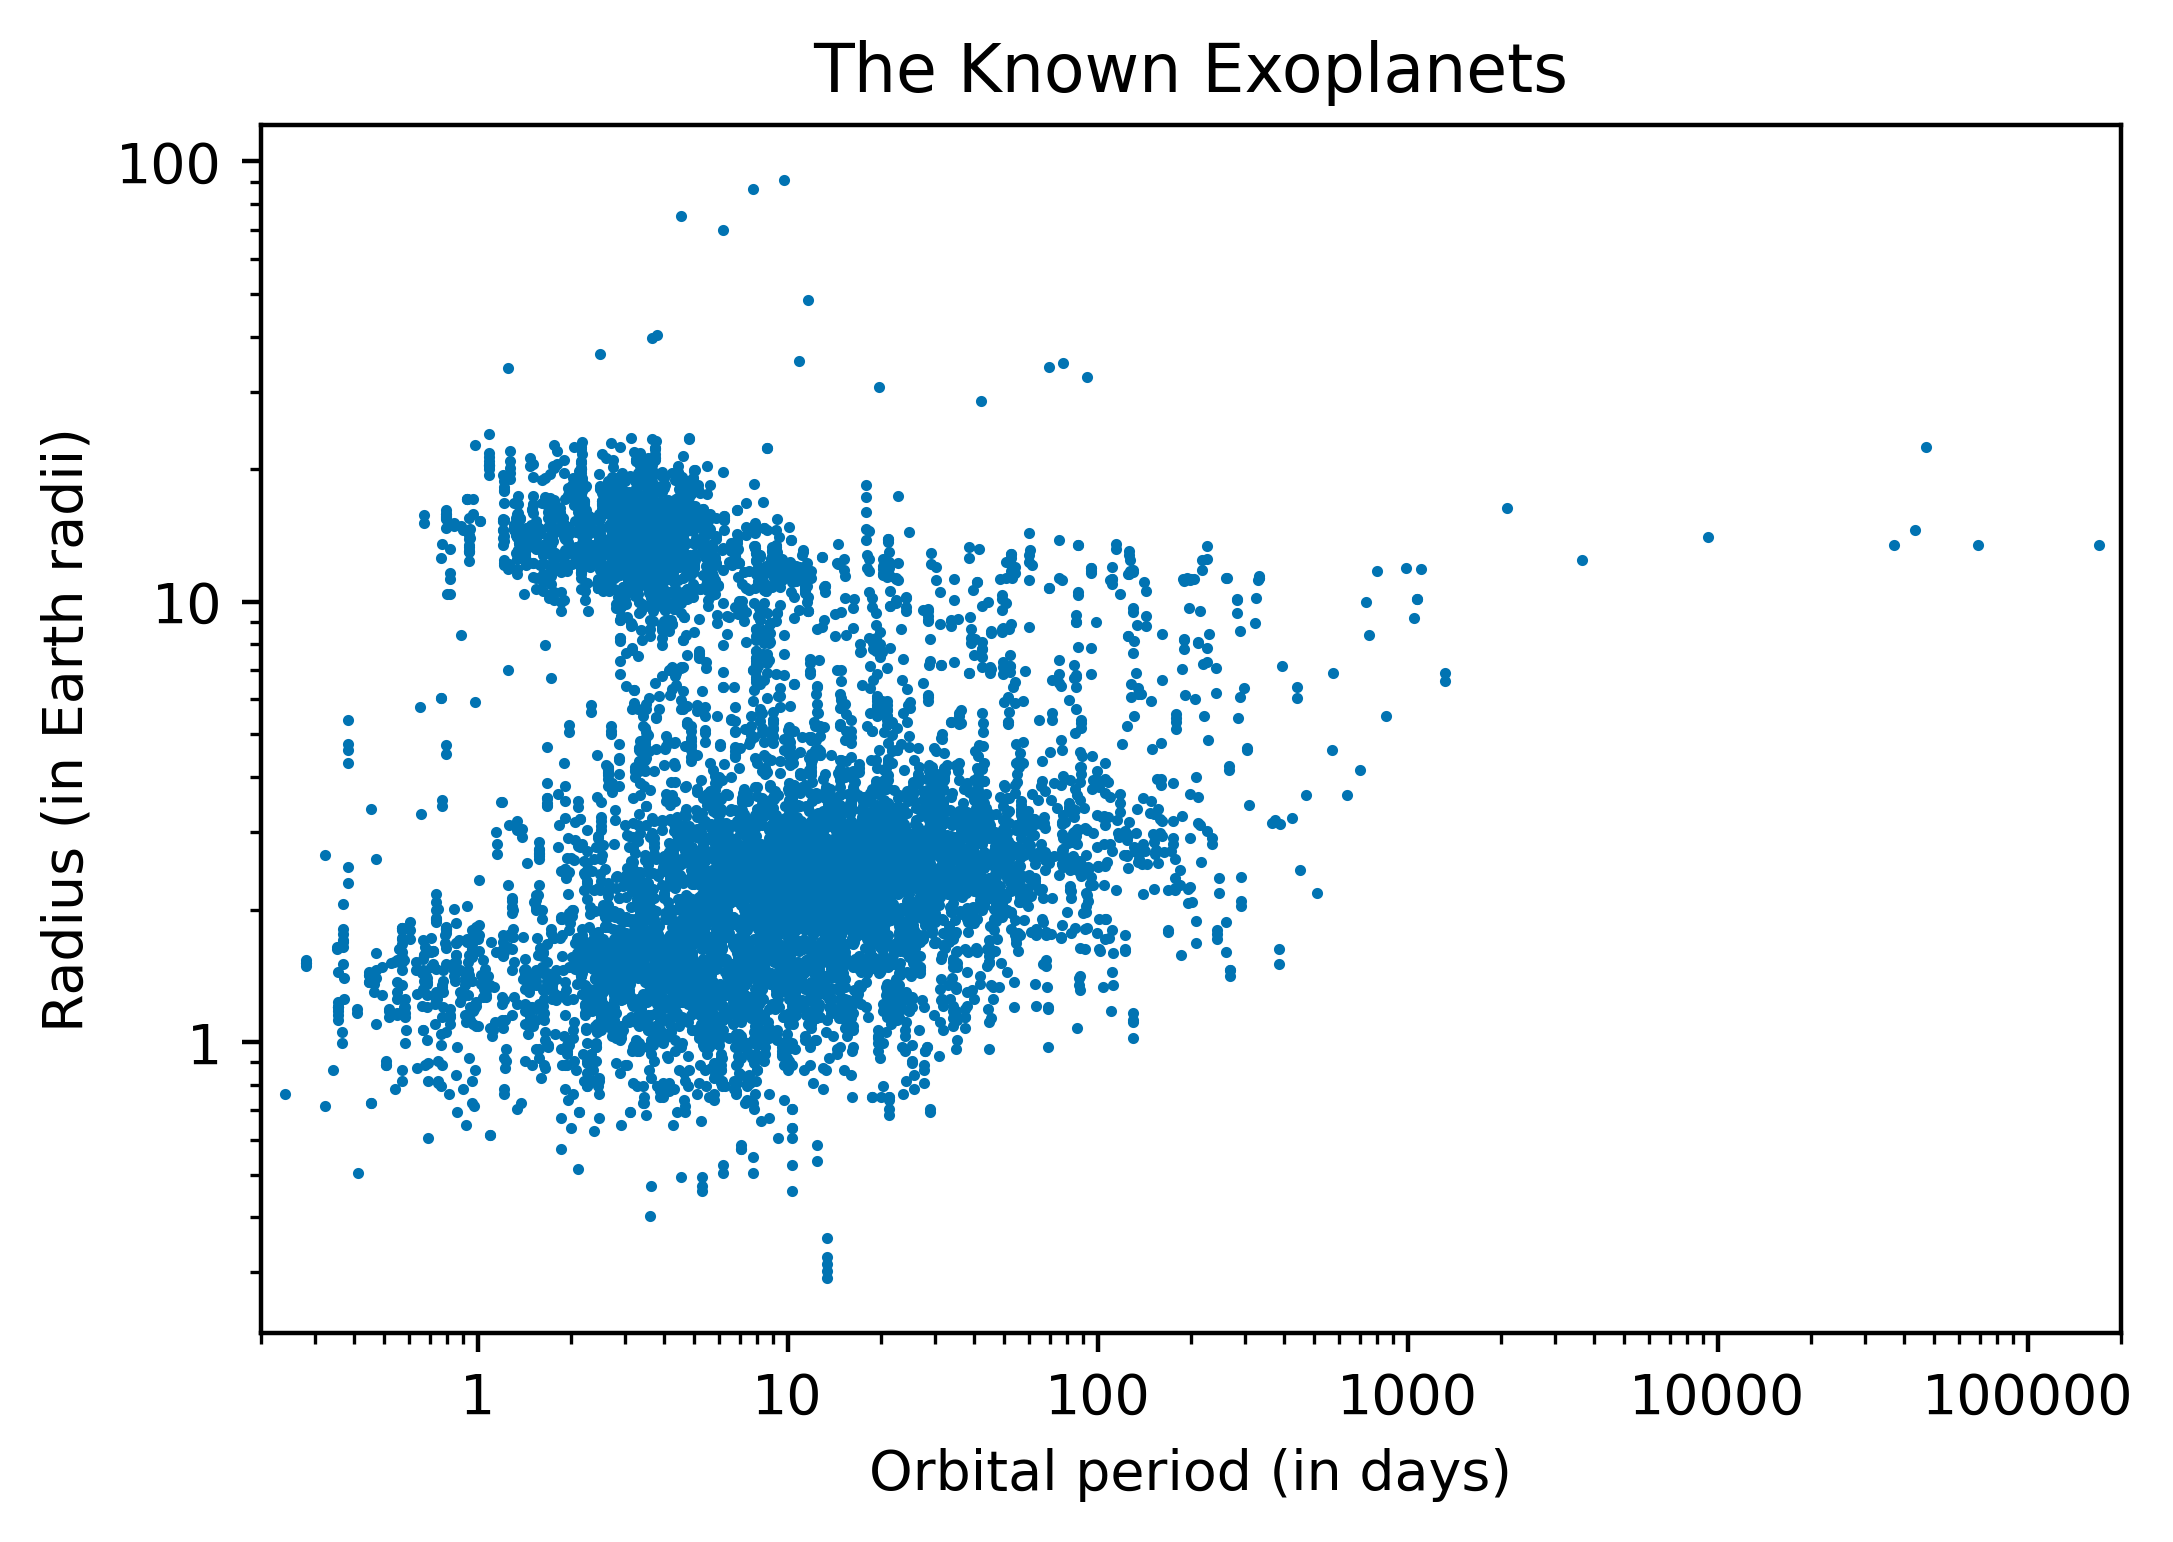

In [16]:
from matplotlib.ticker import ScalarFormatter
palette = color_palette('colorblind', 10)
right_lim = 2.e5

jupiter2earth = float(1. * u.jupiterRad / u.earthRad)

fig, ax = plt.subplots(1, 1, dpi=400)
ax.scatter(dat.pl_orbper, dat.pl_radj * jupiter2earth, s=1., color=palette[0])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2, right_lim)
for a in [ax.xaxis, ax.yaxis]:
    a.set_major_formatter(ScalarFormatter())
ax.set_title('The Known Exoplanets')
ax.set_xlabel('Orbital period (in days)')
ax.set_ylabel('Radius (in Earth radii)');

In [17]:
# Solar system data
ss_orbper = [87.96926, 224.7008, 365.25636, 686.97959, 4332.8201, 10755.699, 30687.153, 60190.03]
ss_rad    = [0.383, 0.95, 1., 0.532, 10.979, 9.151, 3.981, 3.86]
ss_names  = ['M', 'V', 'E', 'M', 'J', 'S', 'U', 'N']

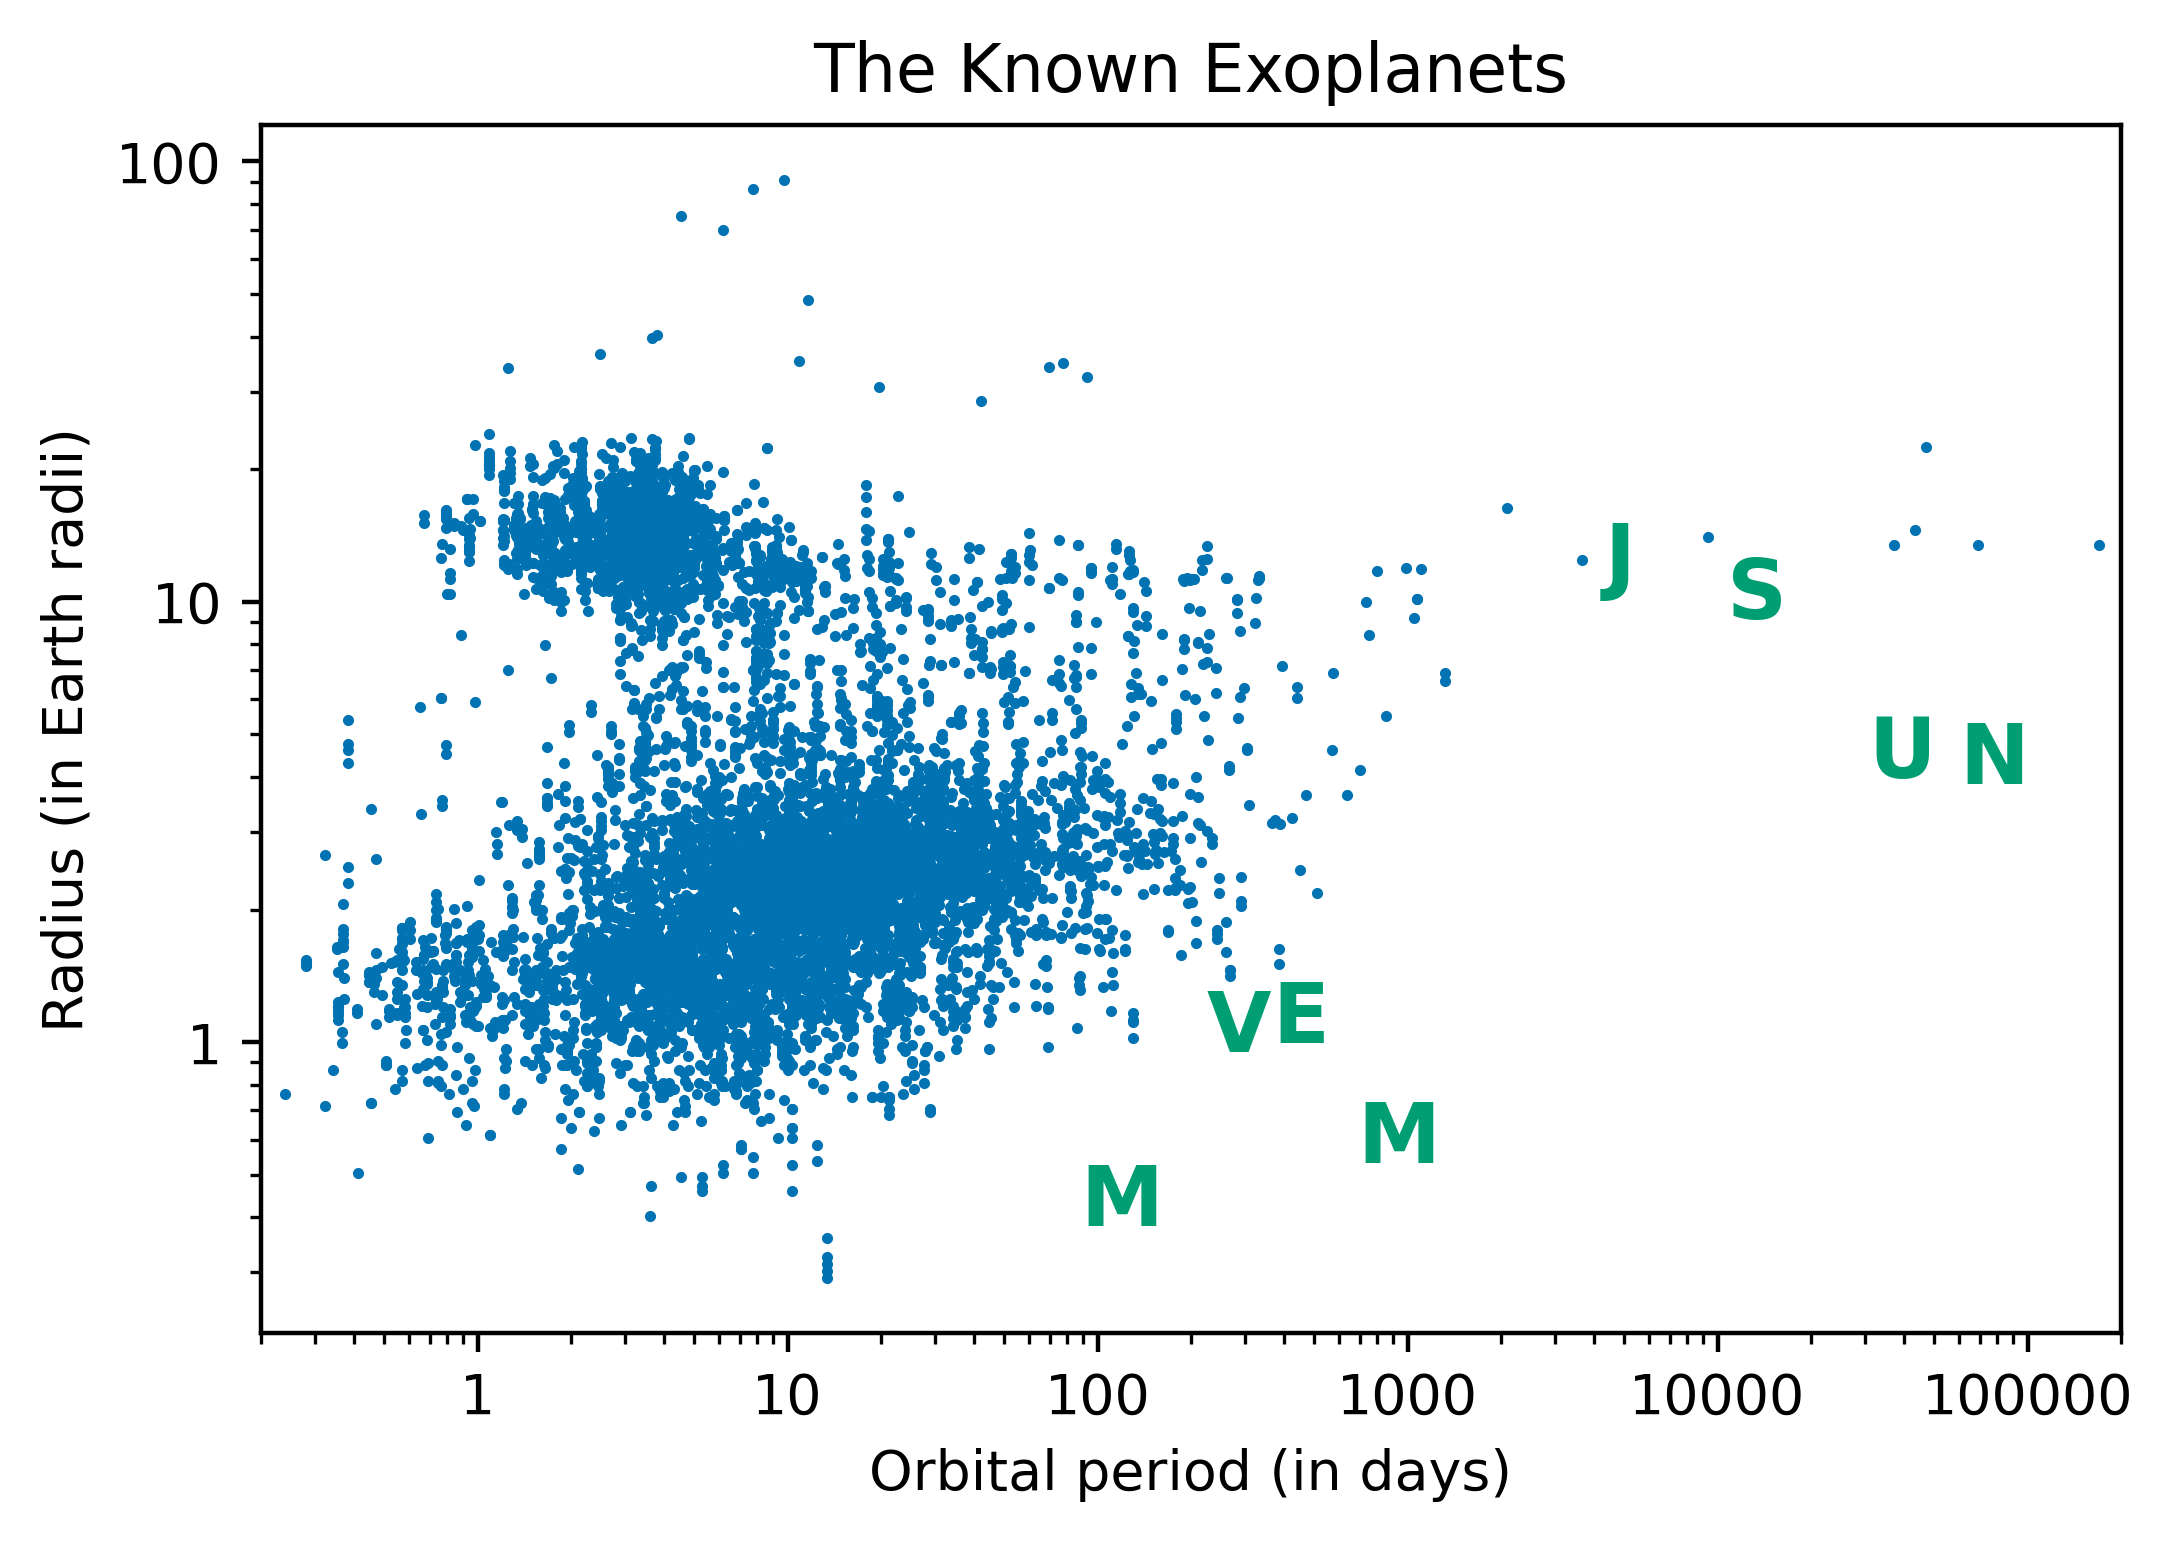

In [18]:
font = {'color': palette[2],
        'weight': 'bold',
        'size': 15,
       }

fig, ax = plt.subplots(1, 1, dpi=400)
ax.scatter(dat.pl_orbper, dat.pl_radj * jupiter2earth, s=1., color=palette[0])
# ax.scatter(ss_orbper, ss_rad, s=10., color=palette[1])
for i, p in enumerate(ss_names):
    if ss_orbper[i] < right_lim:
        ax.text(ss_orbper[i], ss_rad[i], p, fontdict=font)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2, right_lim)
for a in [ax.xaxis, ax.yaxis]:
    a.set_major_formatter(ScalarFormatter())
ax.set_title('The Known Exoplanets')
ax.set_xlabel('Orbital period (in days)')
ax.set_ylabel('Radius (in Earth radii)');

In [19]:
exoplanet_data = {'period': dat.pl_orbper,
                  'radius': dat.pl_radj * jupiter2earth,
                  'transit': dat.pl_trandep
                 }

exo = pd.DataFrame(data=exoplanet_data)

transit_exo = exo.dropna()
nontransit_exo = exo.mask(exo['transit'] >= 0.).mask(exo['transit'] < 0.)

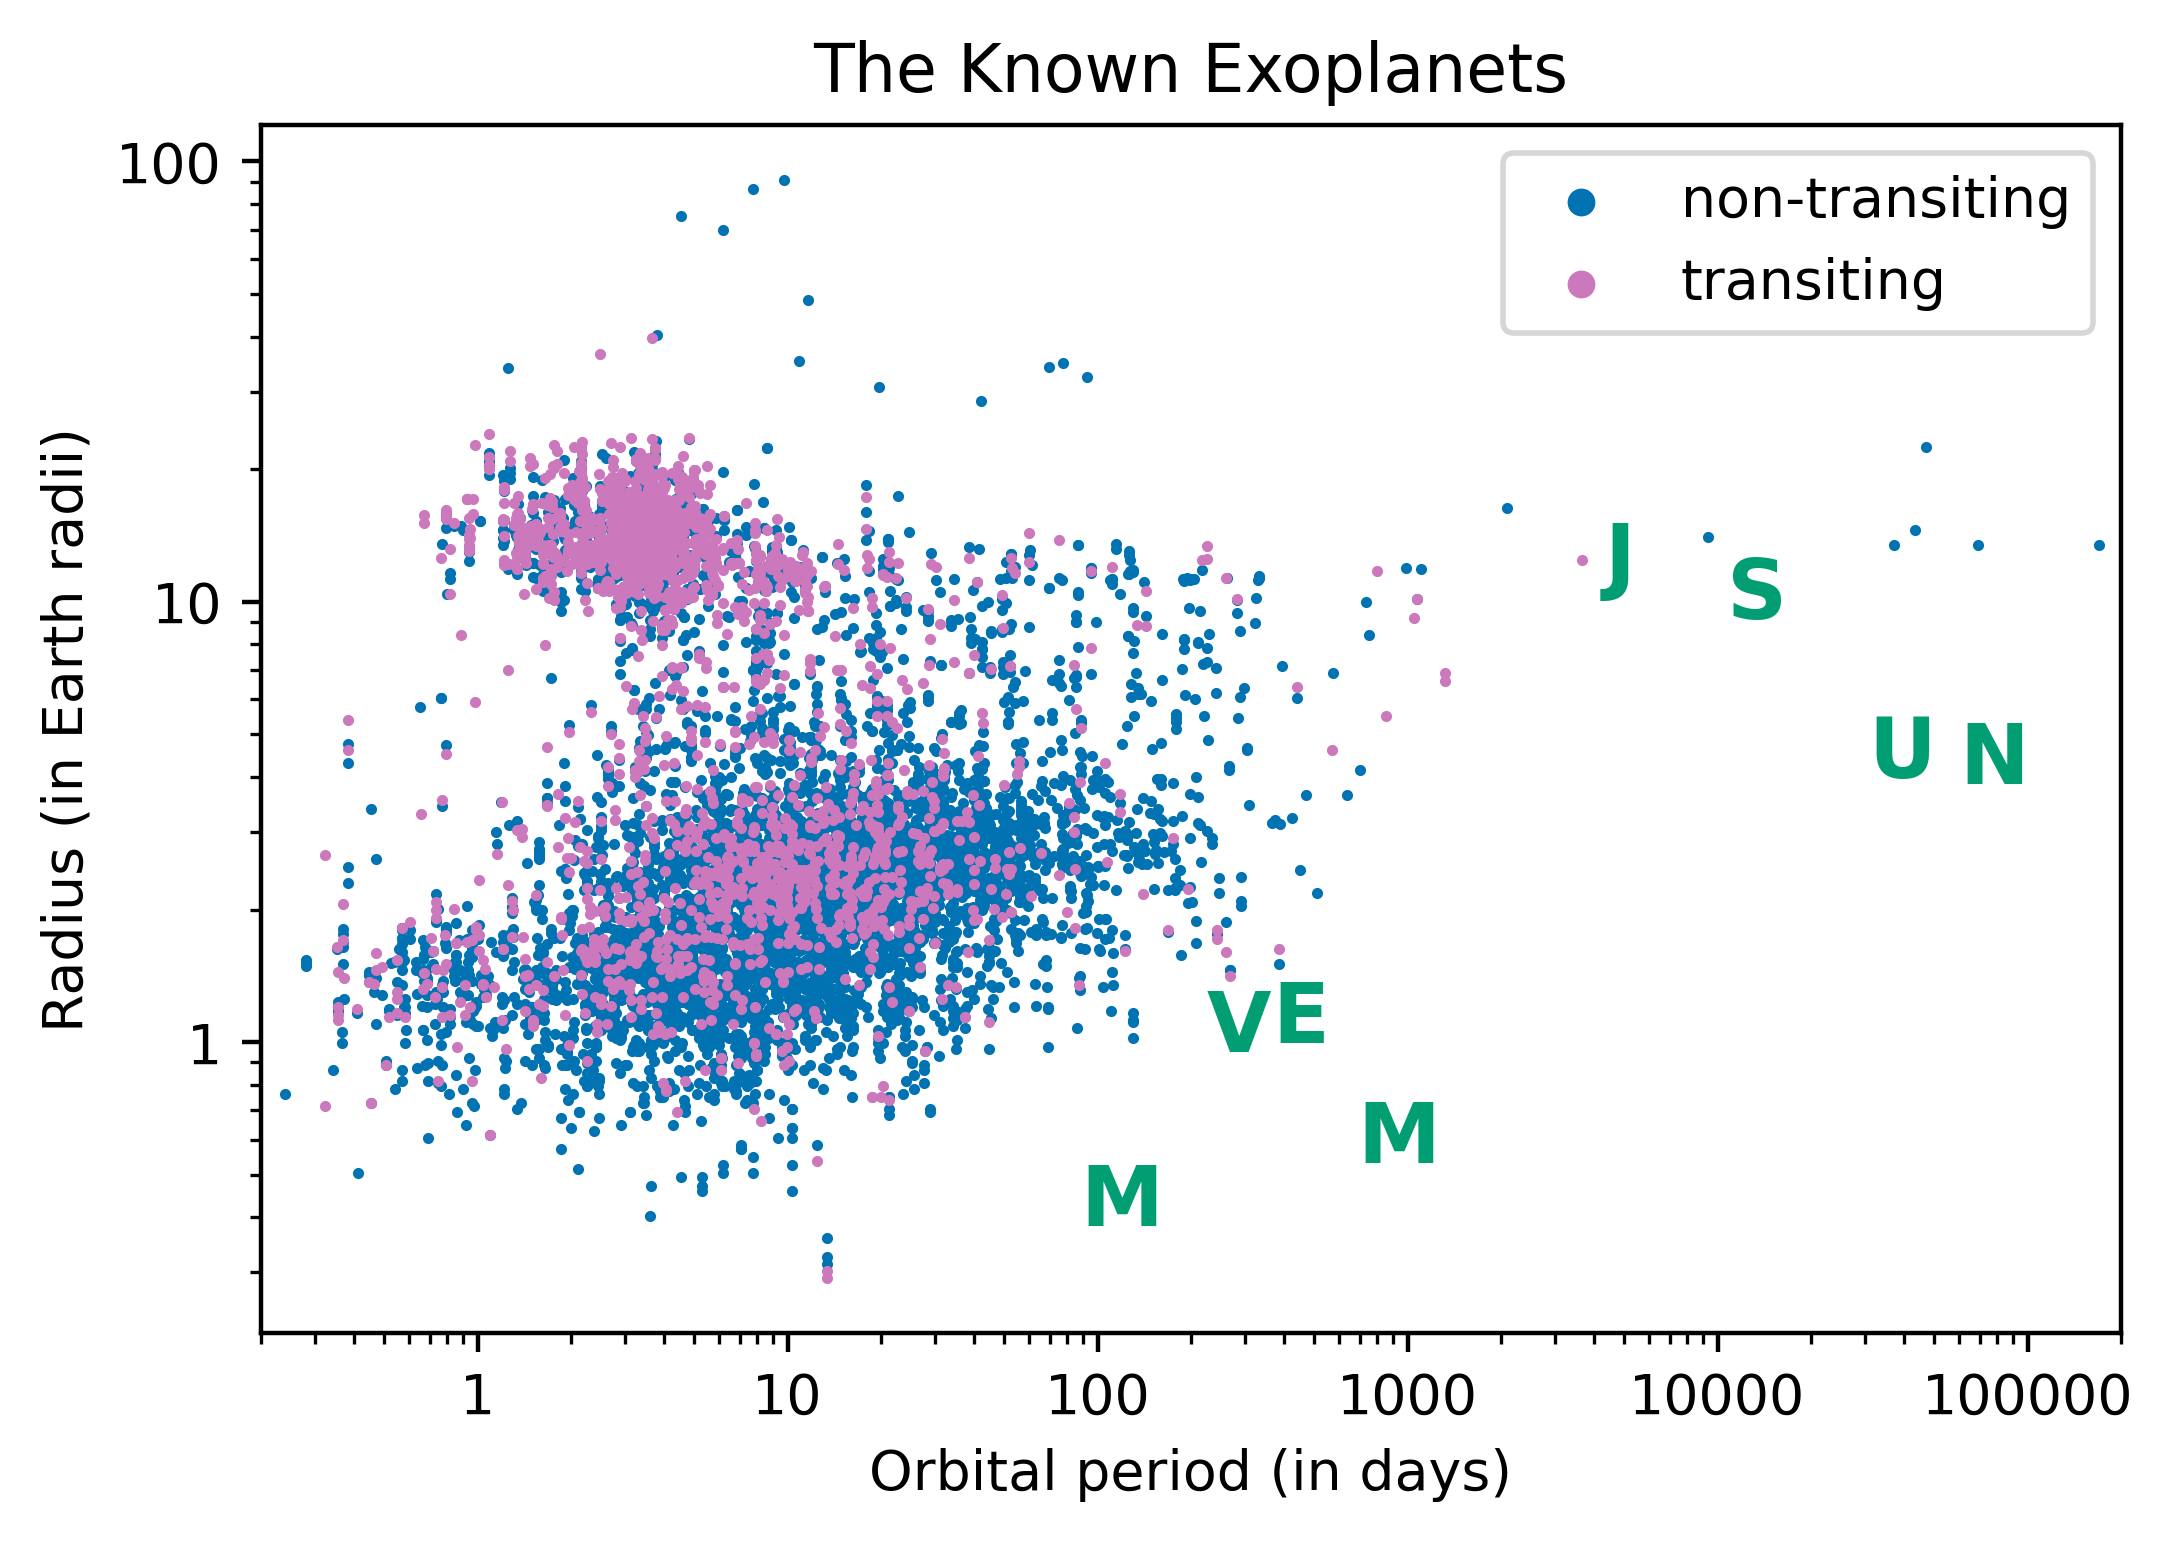

In [20]:
fig, ax = plt.subplots(1, 1, dpi=400)
ax.scatter(nontransit_exo['period'], nontransit_exo['radius'], s=1., color=palette[0], label='non-transiting')
ax.scatter(transit_exo['period'], transit_exo['radius'], s=1., color=palette[4], label='transiting')
for i, p in enumerate(ss_names):
    if ss_orbper[i] < right_lim:
        ax.text(ss_orbper[i], ss_rad[i], p, fontdict=font)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2, right_lim)
for a in [ax.xaxis, ax.yaxis]:
    a.set_major_formatter(ScalarFormatter())
ax.set_title('The Known Exoplanets')
ax.set_xlabel('Orbital period (in days)')
ax.set_ylabel('Radius (in Earth radii)')
ax.legend(loc=0, markerscale=4.);

# Transit lightcurves

It bears stating explicitly that these plots do not mimic real lightcurves, but rather use Gaussian peaks to make a visual approximation.

In [21]:
from scipy.stats import norm

In [22]:
def fake_transit_data(time, radius_ratio, period):
    if type(radius_ratio) == list:
        radius_ratio = np.array(radius_ratio)
        period = np.array(period)
        num_samples = time.size
        num_planets = radius_ratio.size
        signals = np.ndarray((num_planets, num_samples))
        for i in range(num_planets):
            stdev = 1. / (np.sqrt(2.*np.pi) * radius_ratio[i]**2.)
            sig = norm(loc=period[i]/2., scale=stdev).pdf(time % (2.*period[i])) / 100.
            signals[i] = np.array(sig)
        return 1. - np.sum(signals, axis=0)
    else:
        stdev = 1. / (np.sqrt(2.*np.pi) * radius_ratio**2.)
        signal = norm(loc=period/2., scale=stdev).pdf(time % (2.*period)) / 100.
        return 1. - signal

def fake_transit_plot(end_time_days, radius_ratio, period_days, ymin=None, color=palette[0]):
    time_days = np.linspace(0., end_time_days, 1000) 
    fig, ax = plt.subplots(1, 1, dpi=400)
    ax.plot(time_days, fake_transit_data(time_days, radius_ratio, period_days) * 100., color=color)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Brightness (%)')
    if ymin != None:
        ax.set_ylim(bottom=ymin)
    ax.ticklabel_format(useOffset=False)

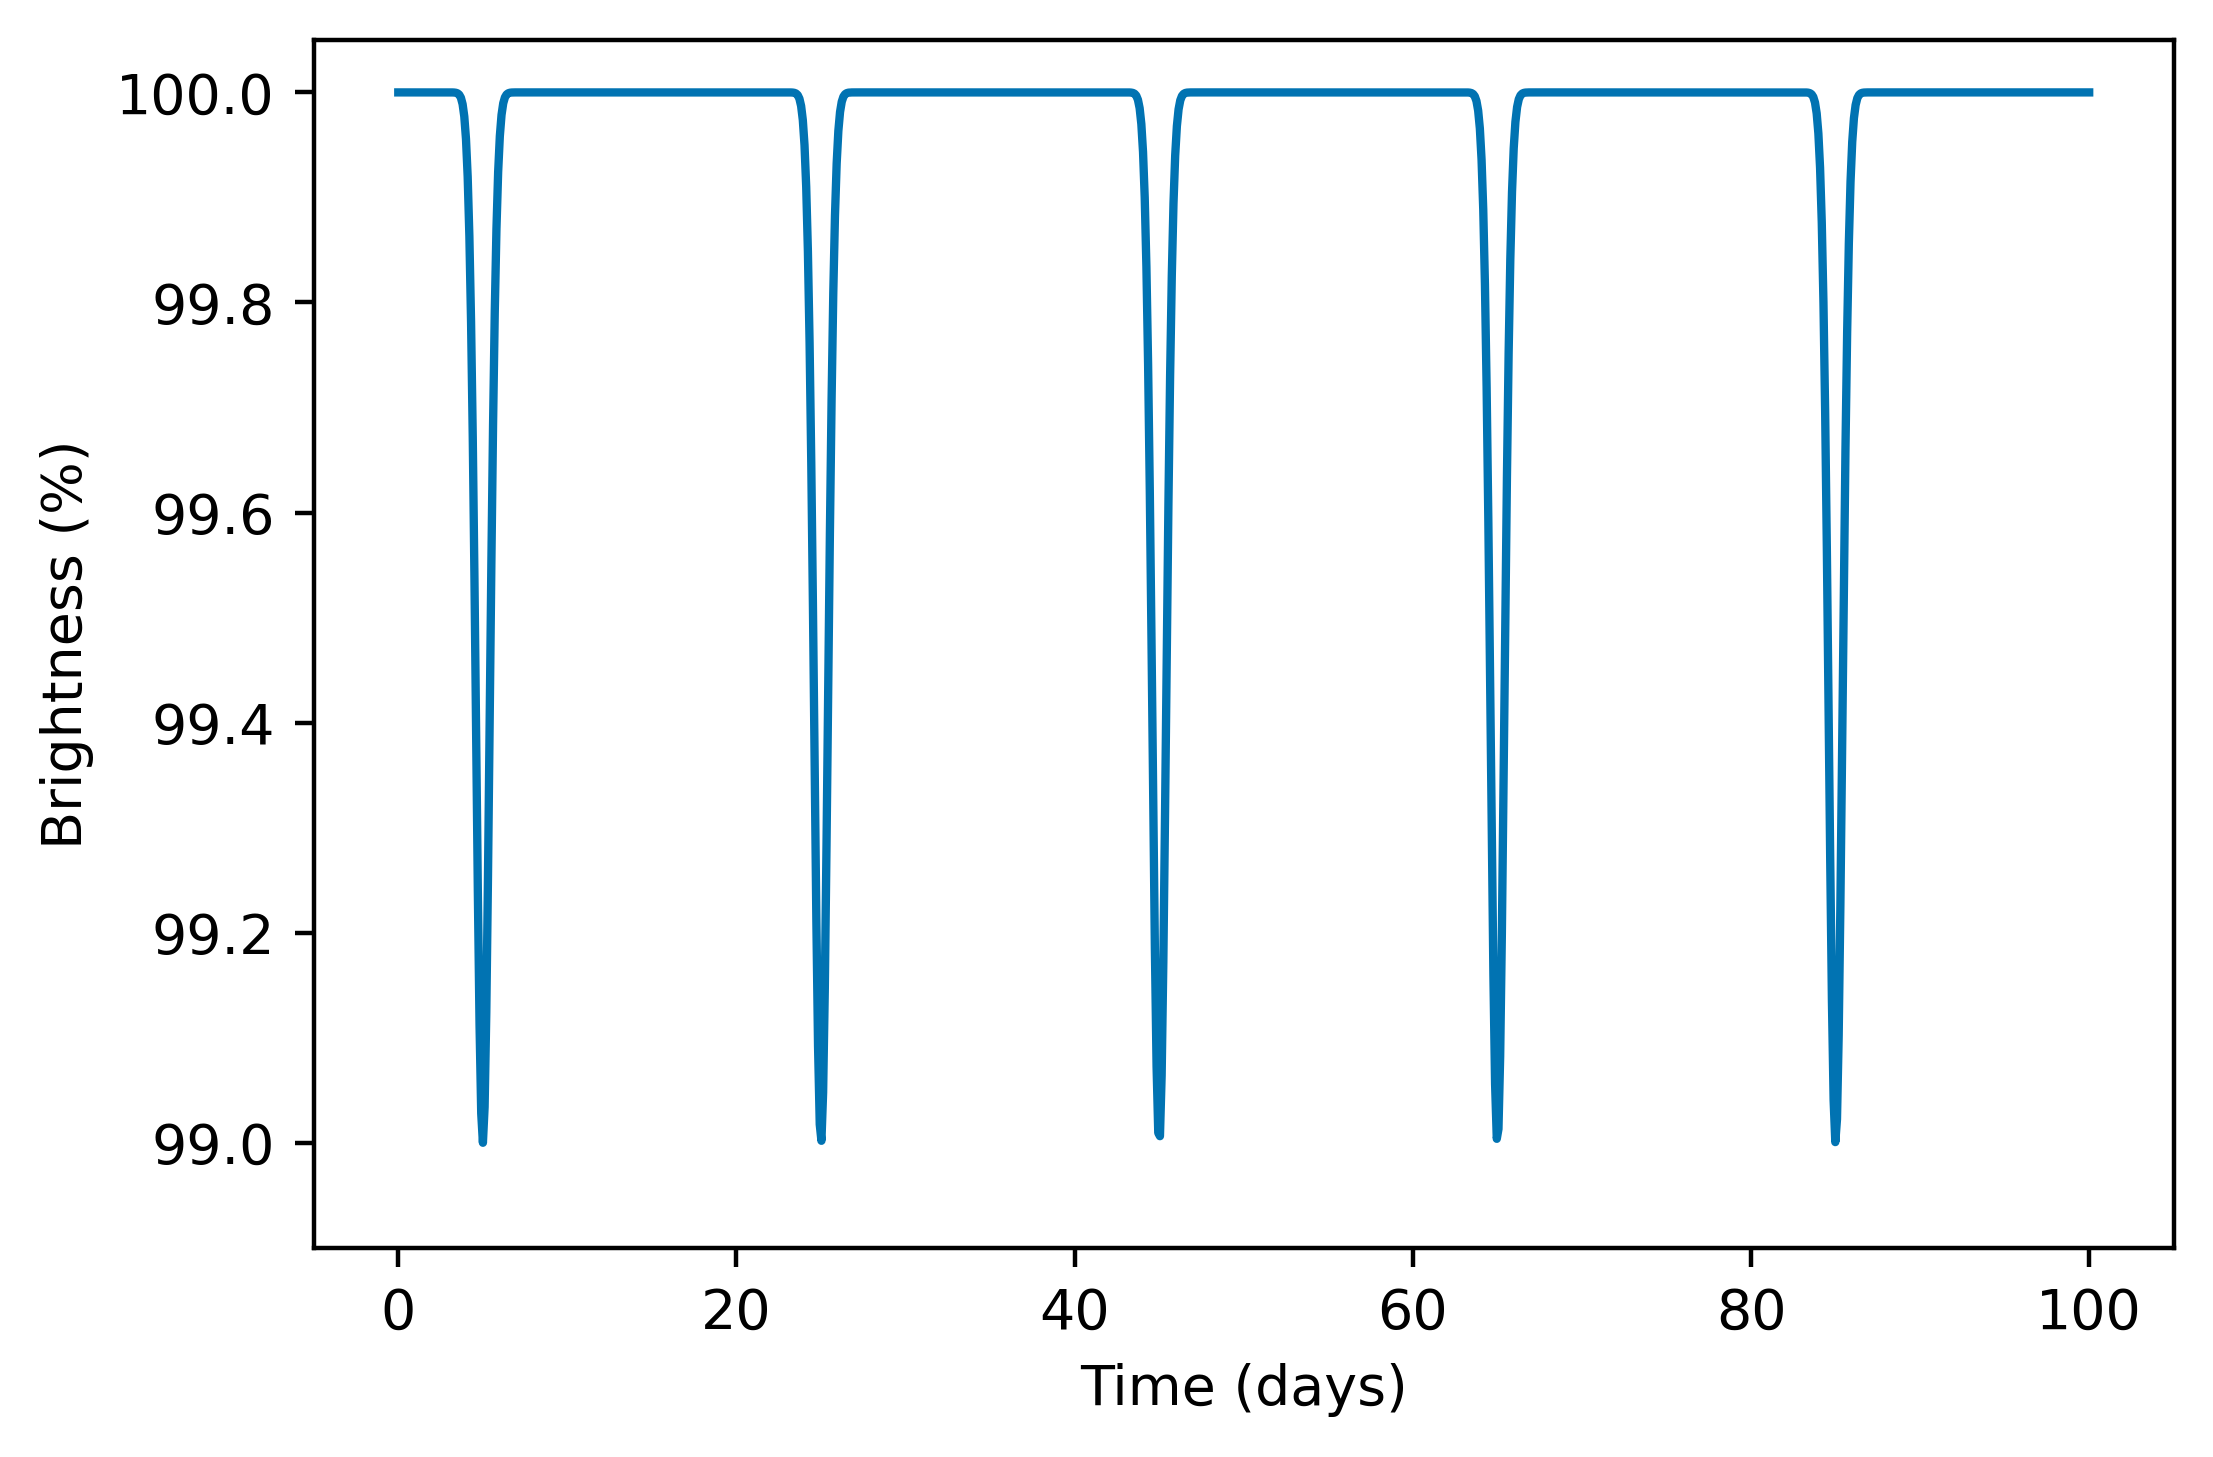

In [23]:
fake_transit_plot(100., 1., 10., ymin=98.9)

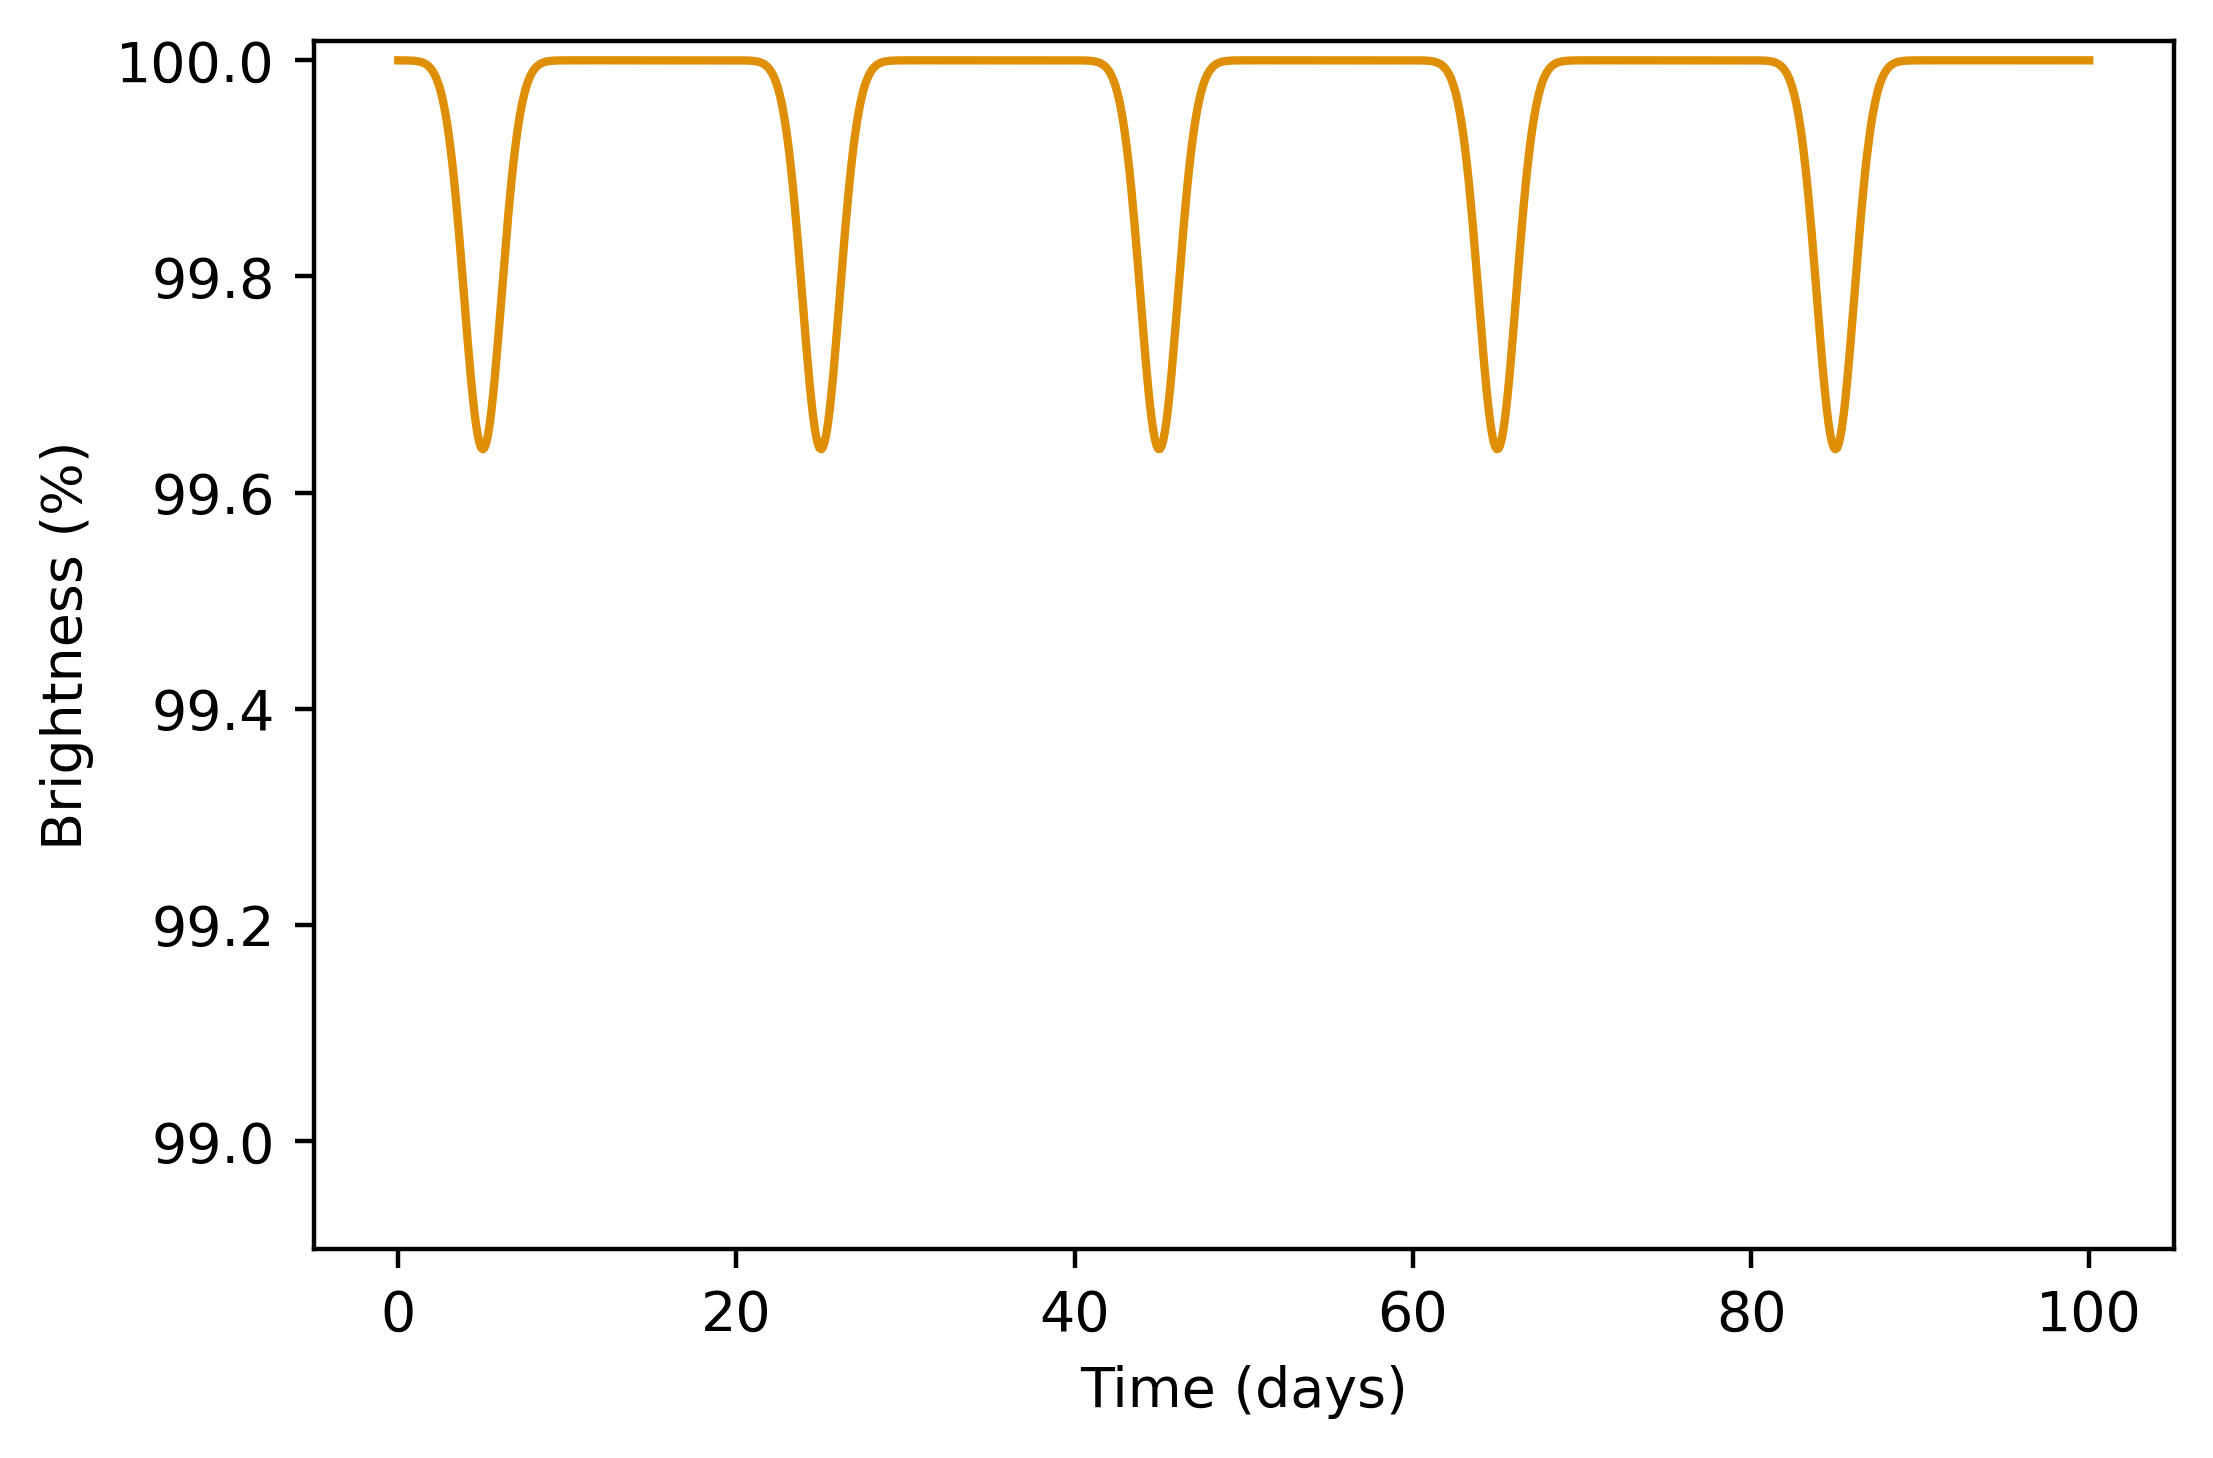

In [24]:
fake_transit_plot(100., 0.6, 10., ymin=98.9, color=palette[1])

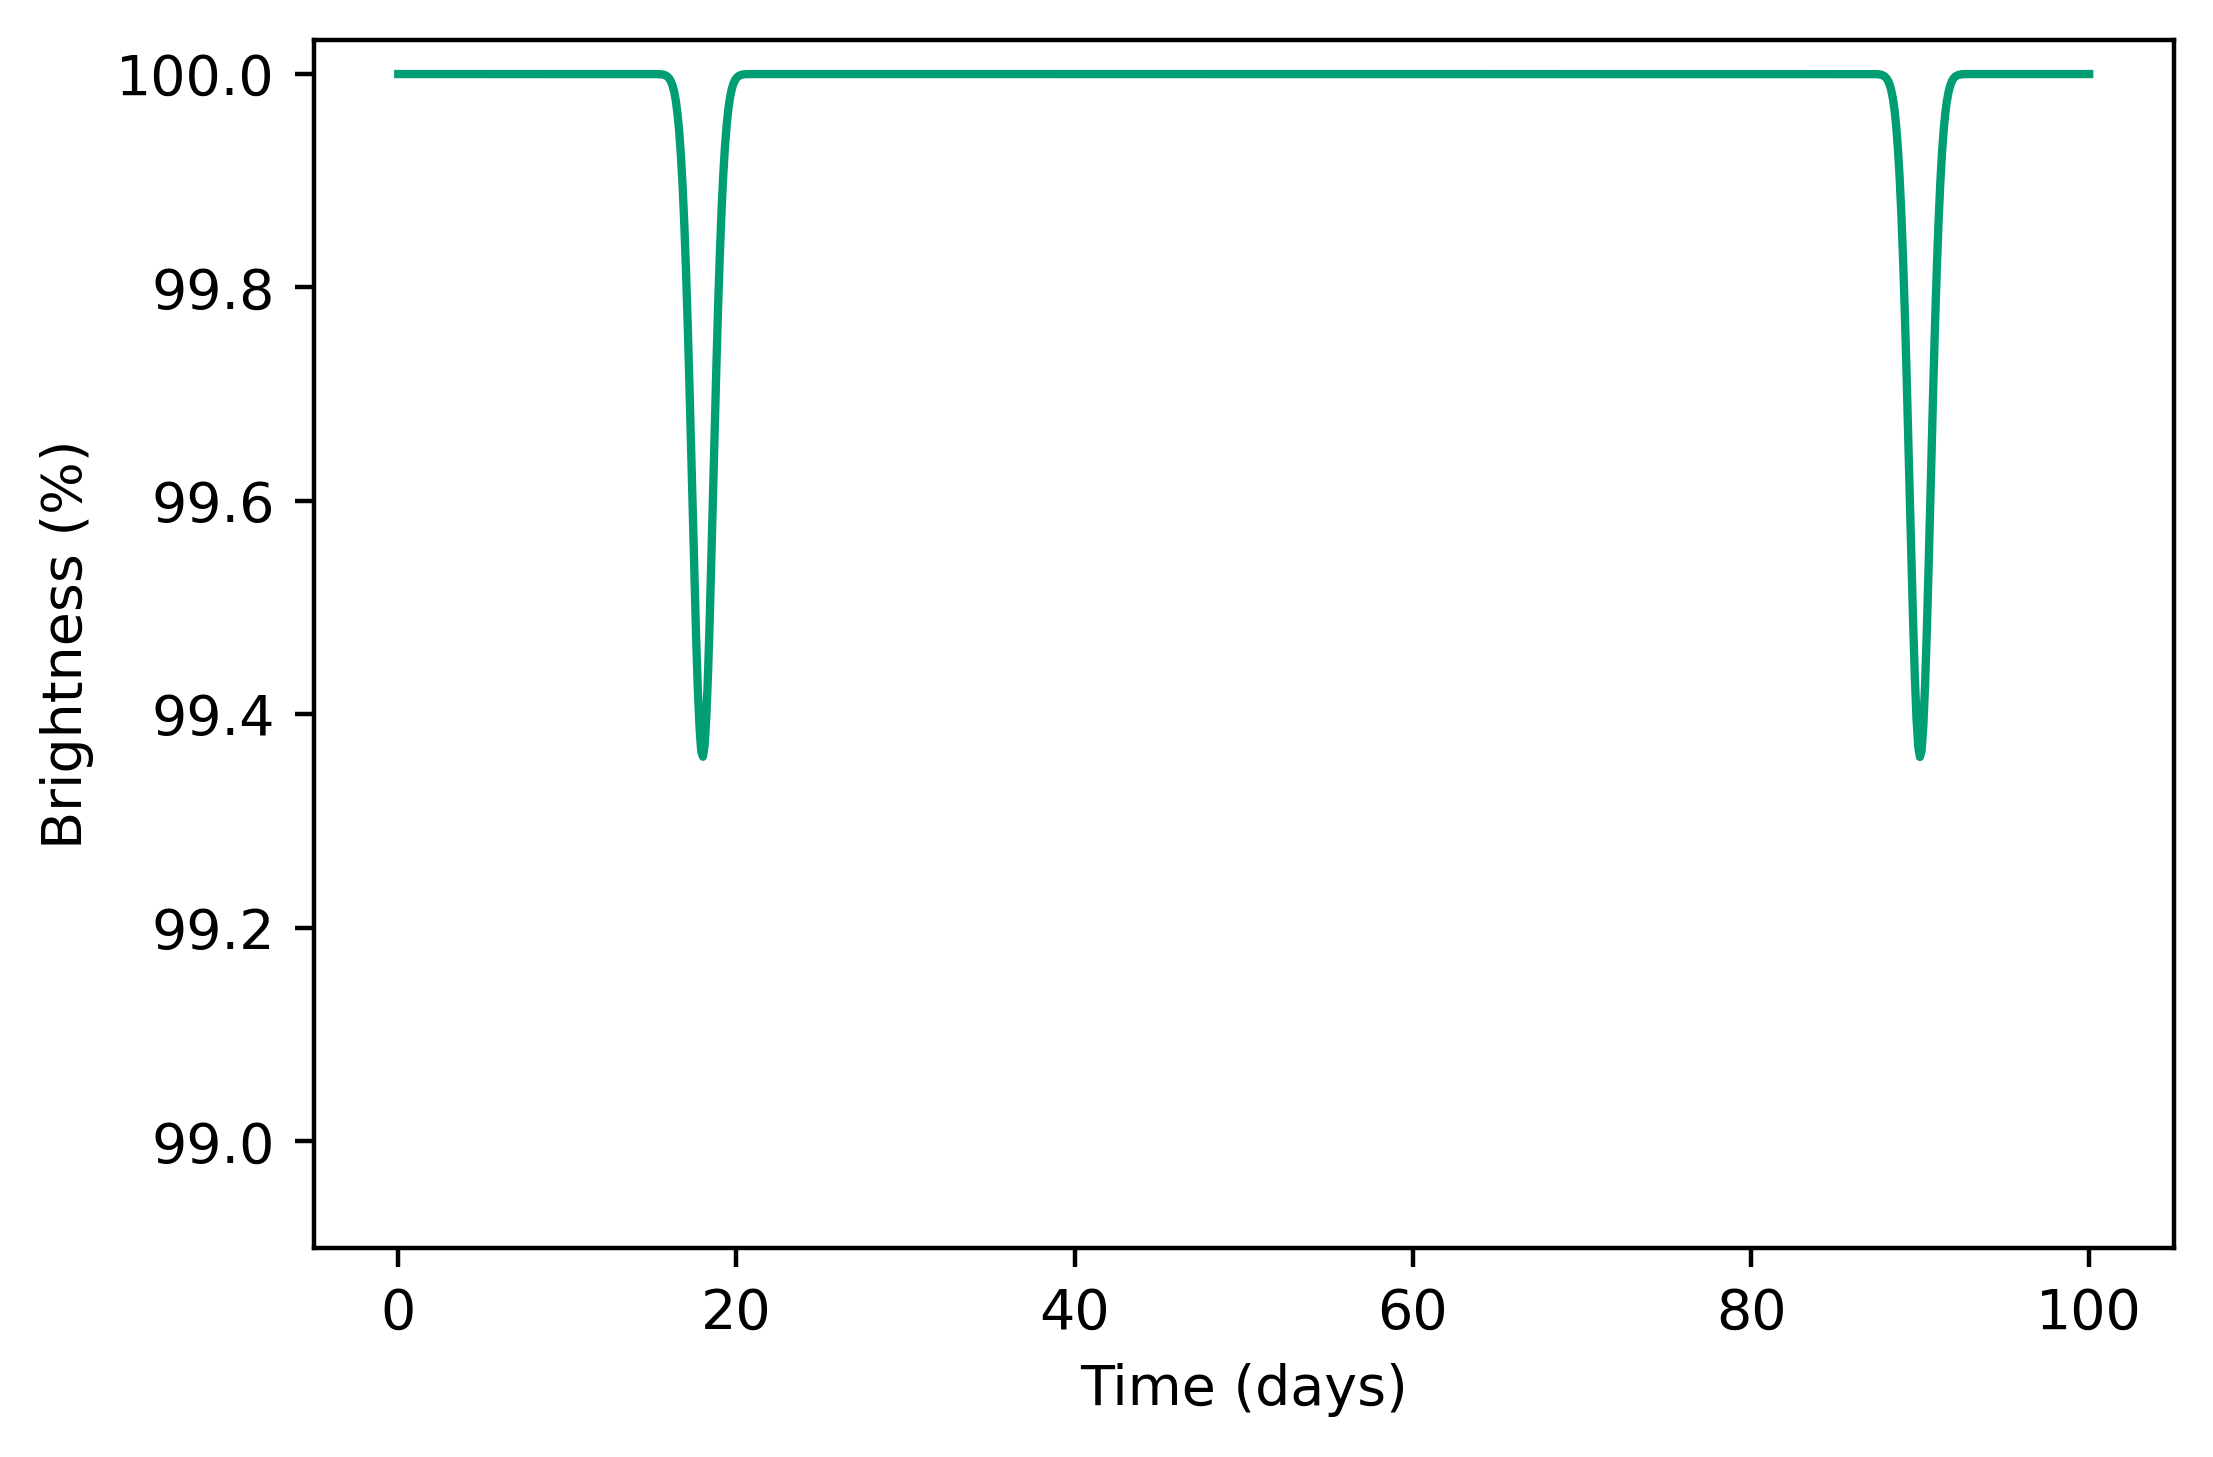

In [25]:
fake_transit_plot(100., 0.8, 36., ymin=98.9, color=palette[2])

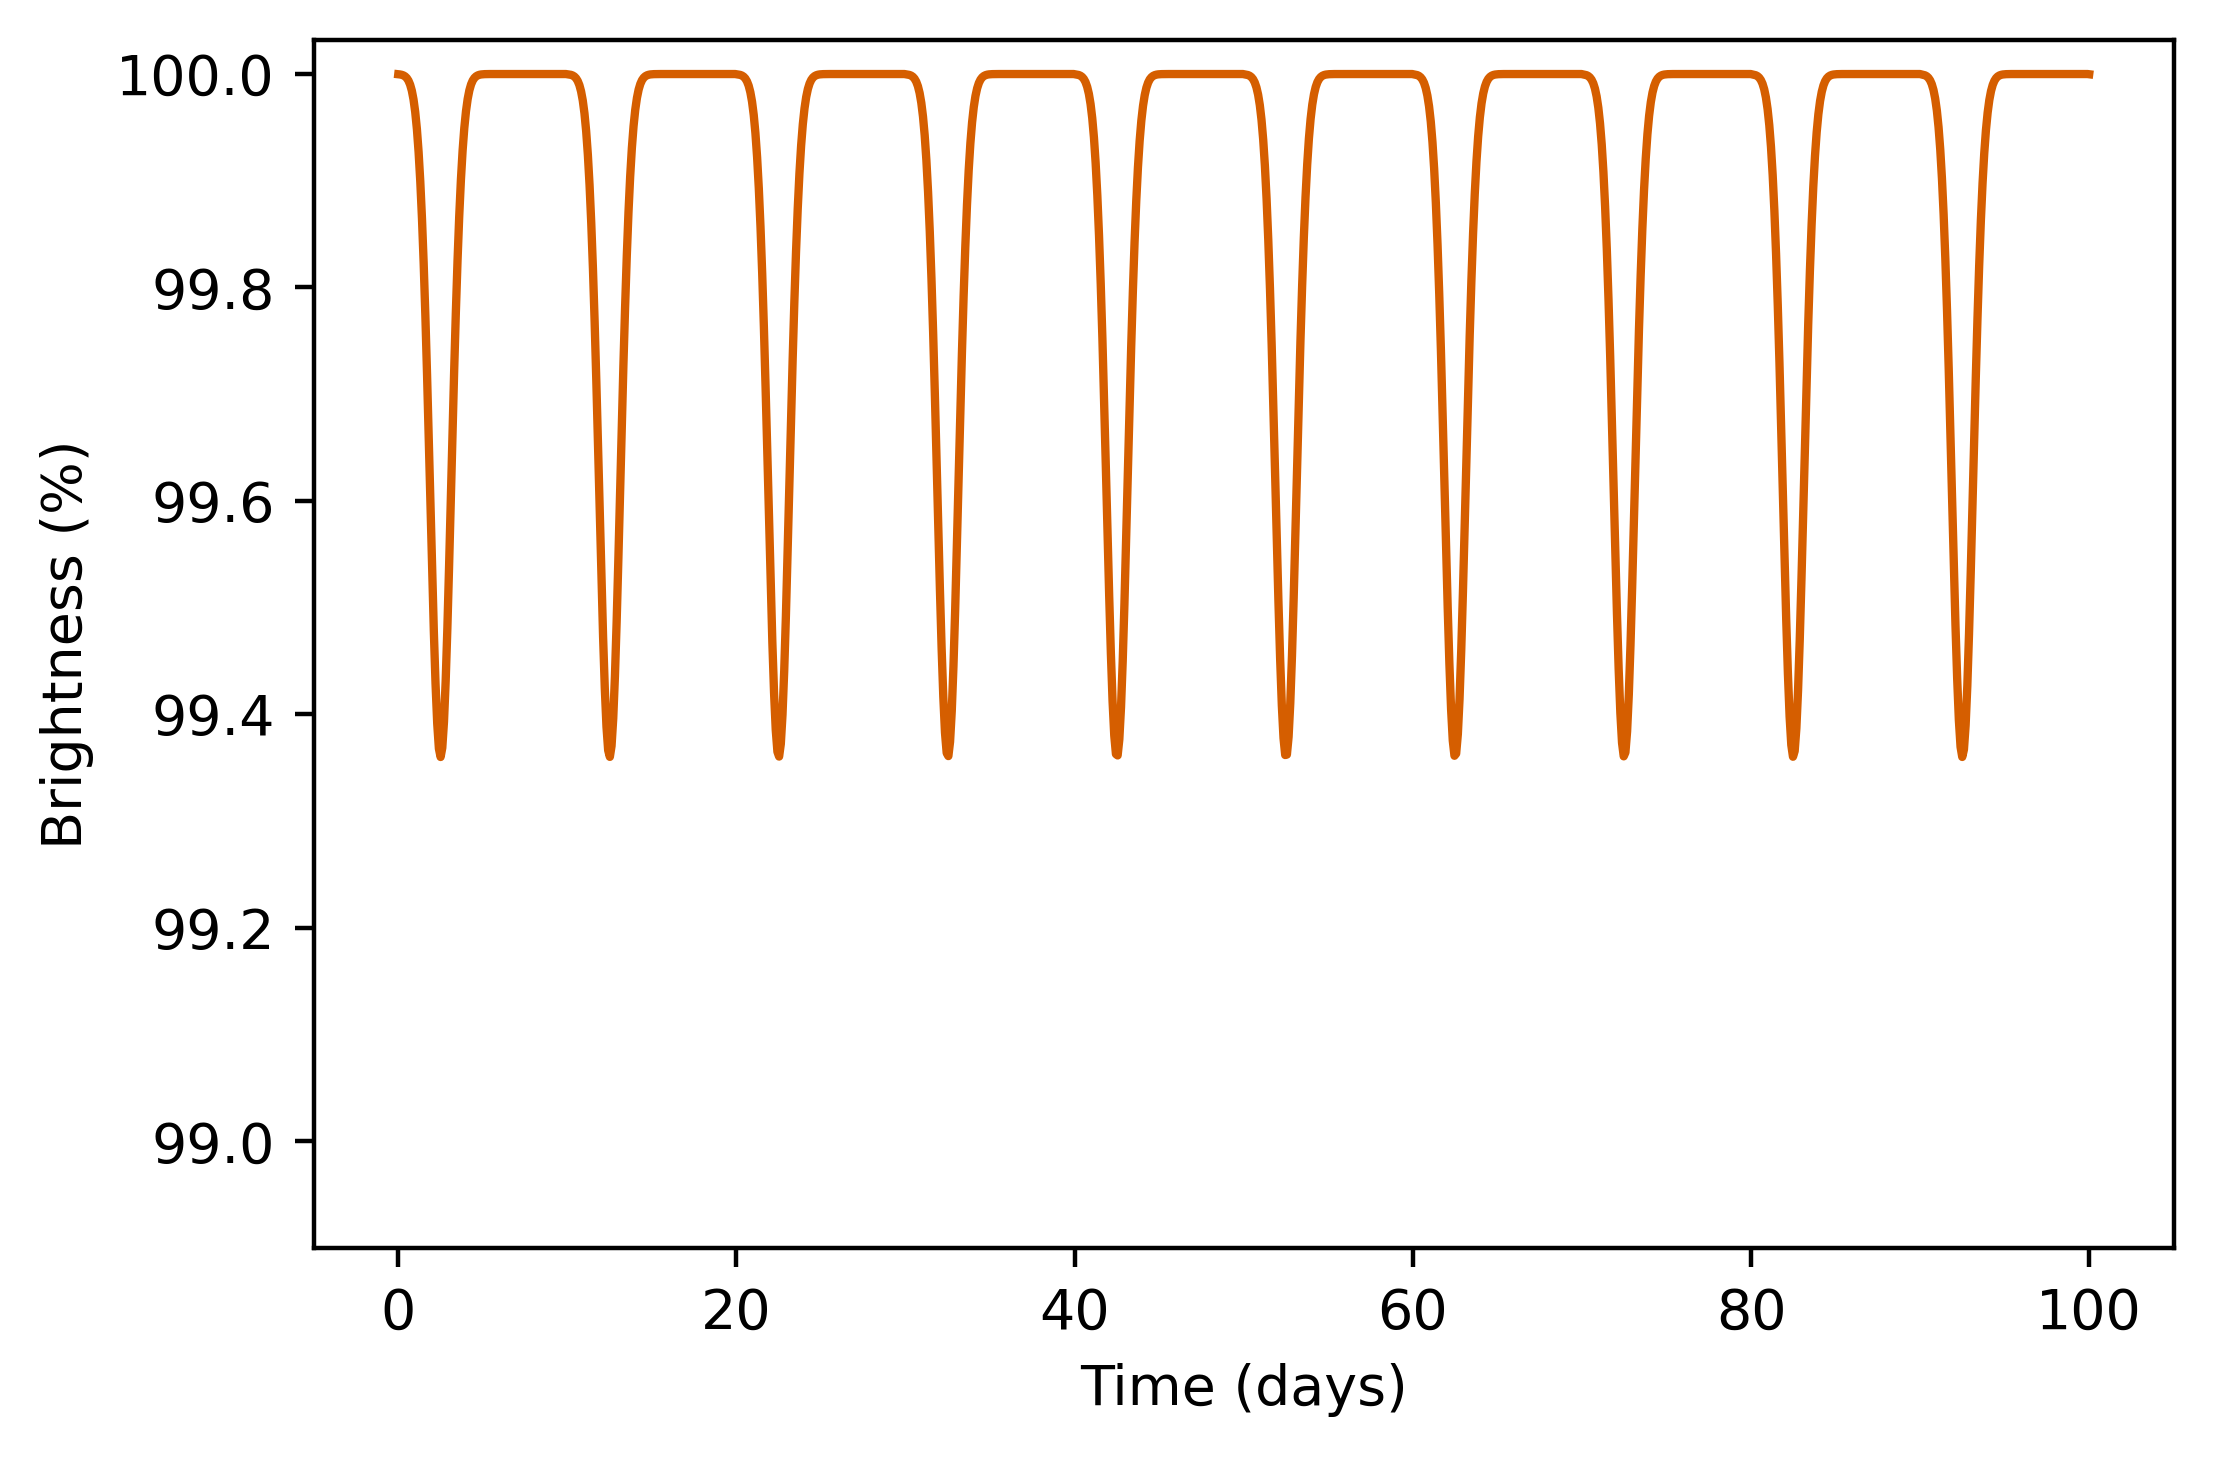

In [26]:
fake_transit_plot(100., 0.8, 5., ymin=98.9, color=palette[3])

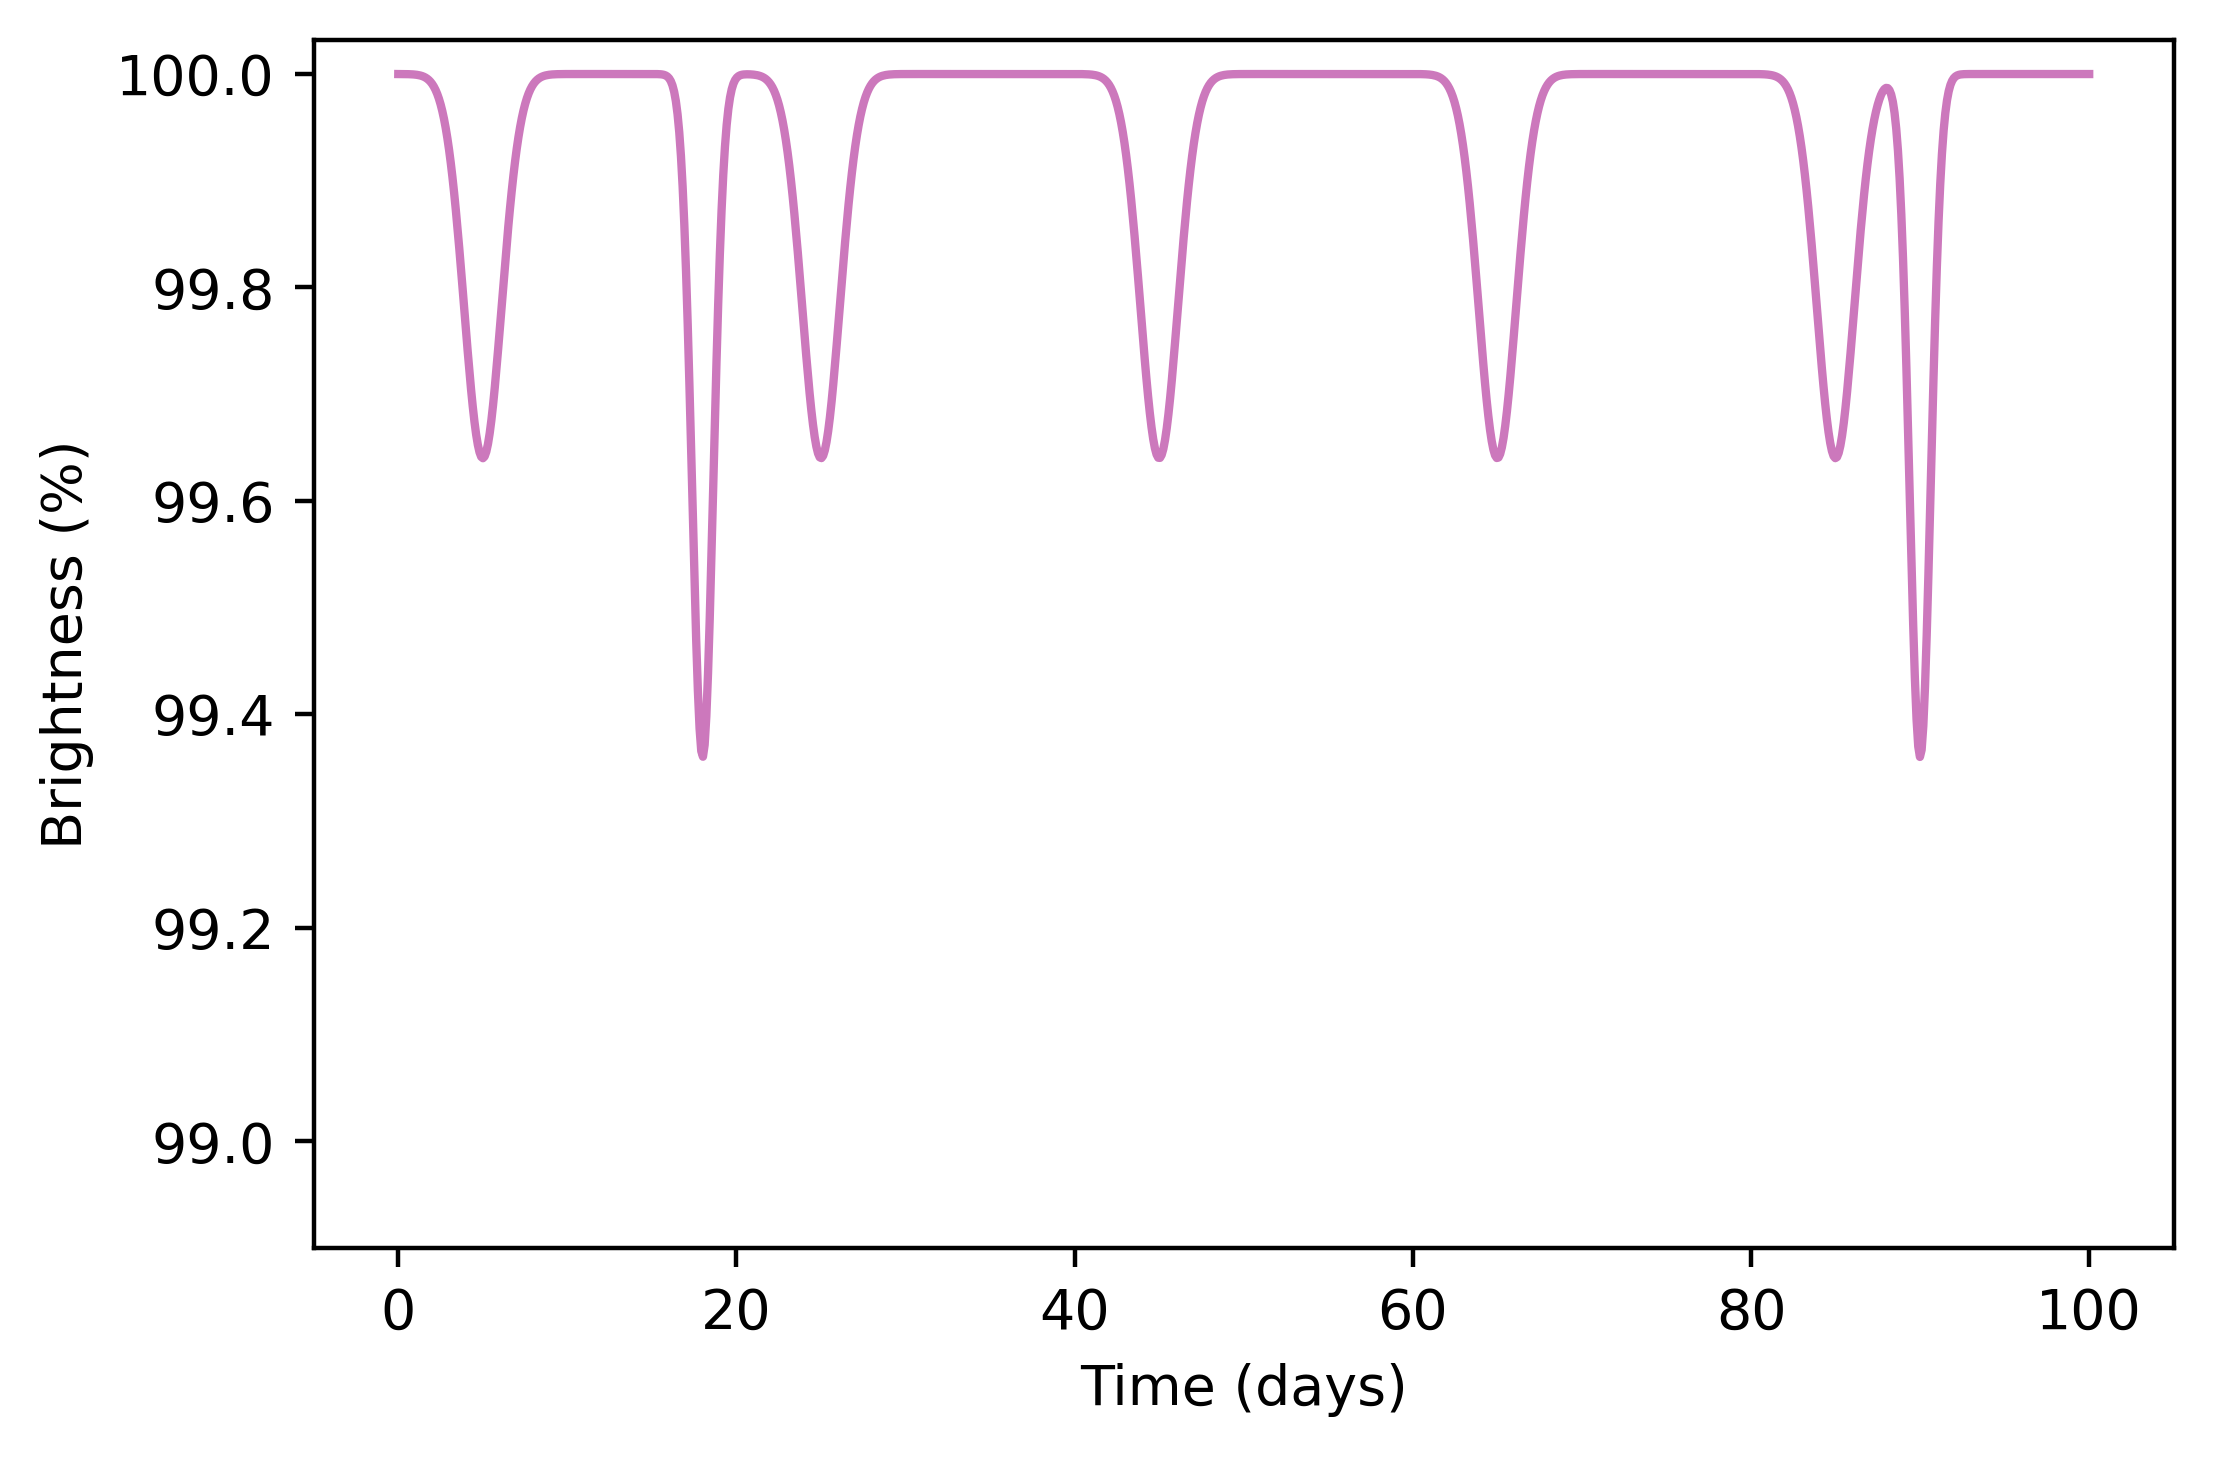

In [27]:
fake_transit_plot(100., [0.6, 0.8], [10., 36.], ymin=98.9, color=palette[4])

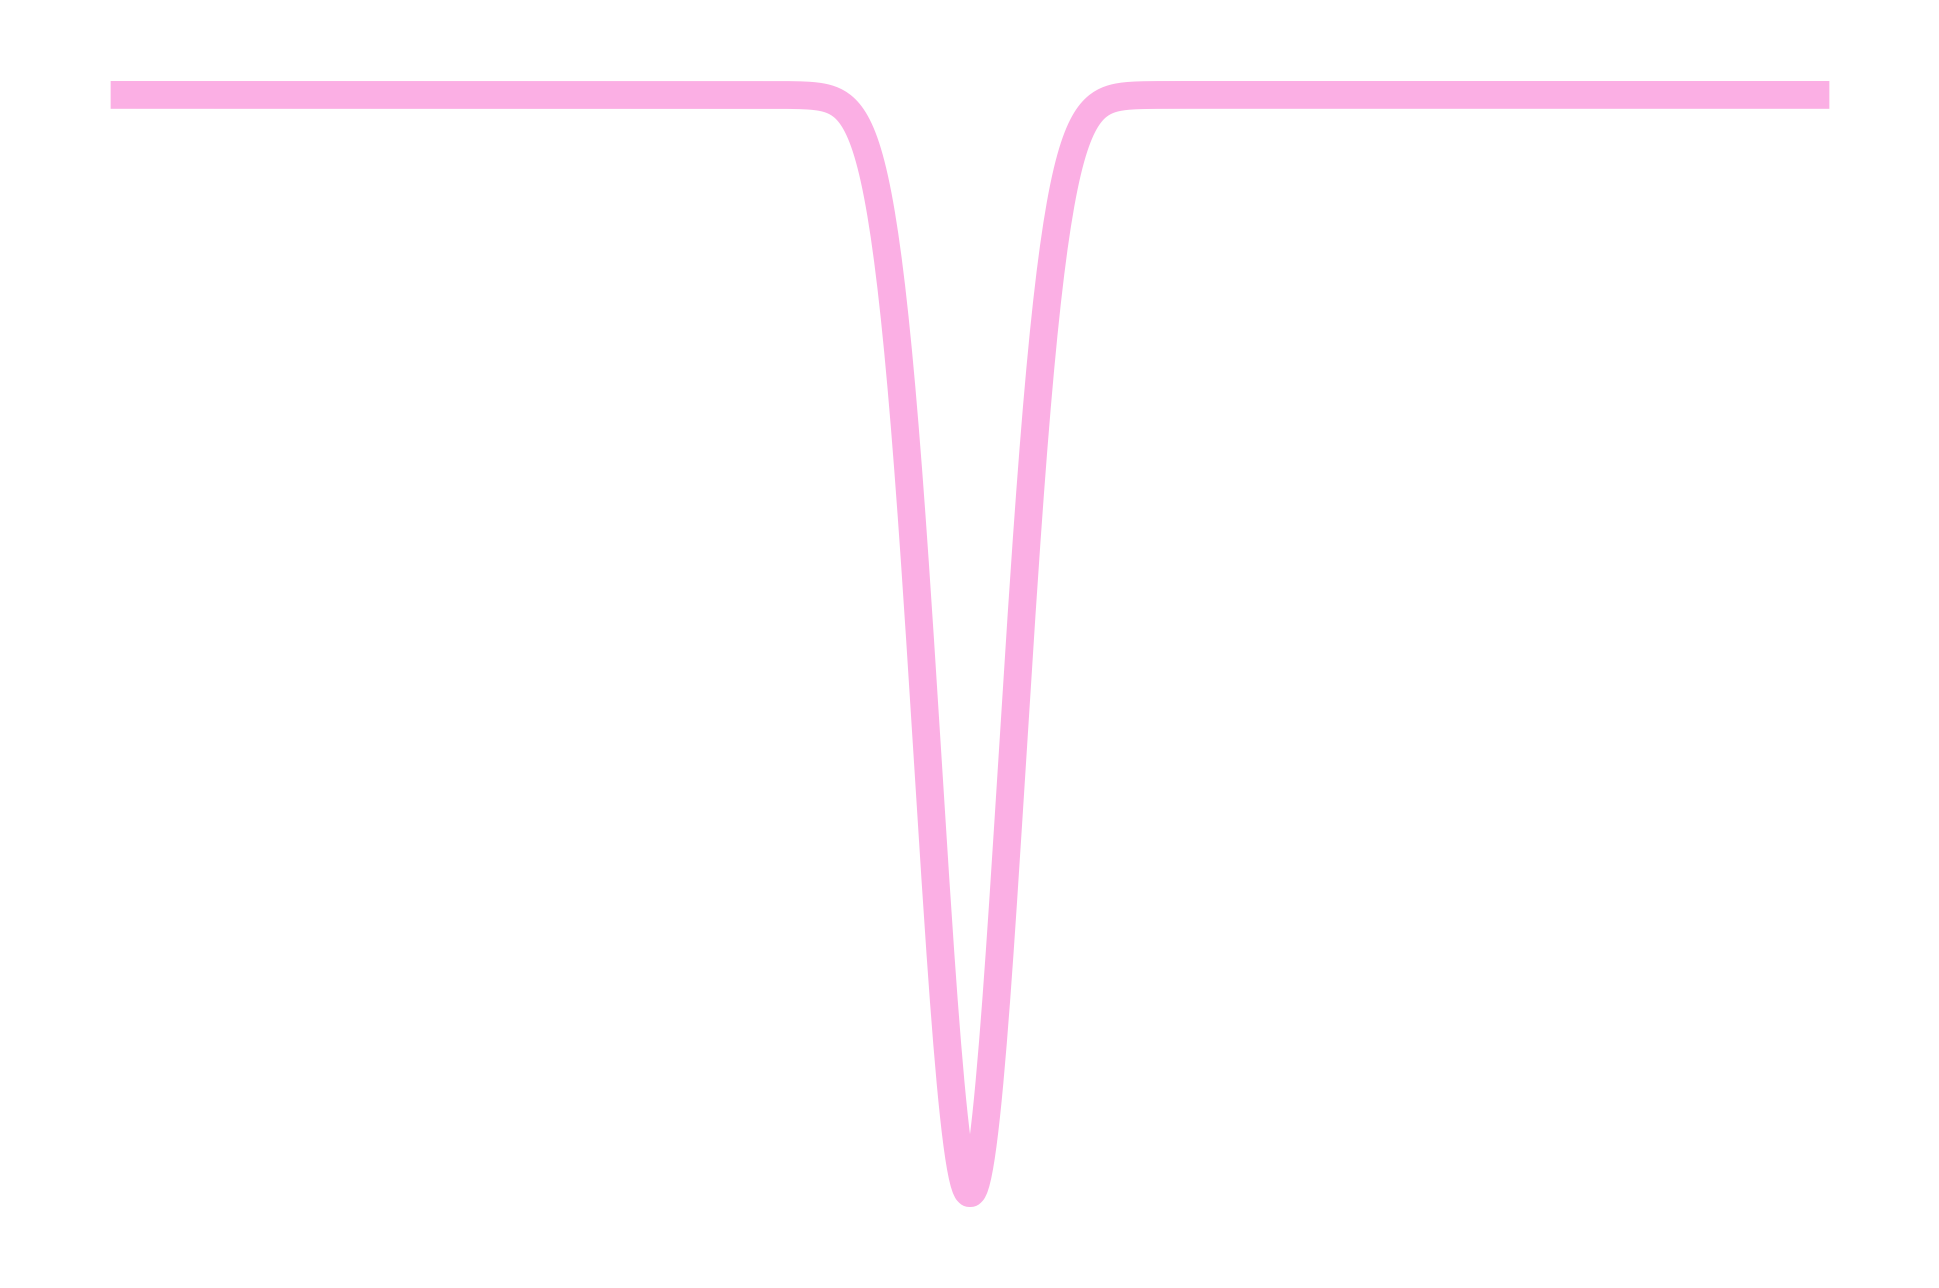

In [28]:
time = np.linspace(0., 100., 1000)

fig = plt.figure(dpi=400)
plt.plot(time, fake_transit_data(time, 0.4, 100.), lw=5, color=palette[6])
plt.axis('off');

## Earth as a transiting exoplanet

In [29]:
earth_sun_radius_ratio = const.R_earth/const.R_sun
depth = earth_sun_radius_ratio**2.
depth

<Quantity 8.40501788e-05>

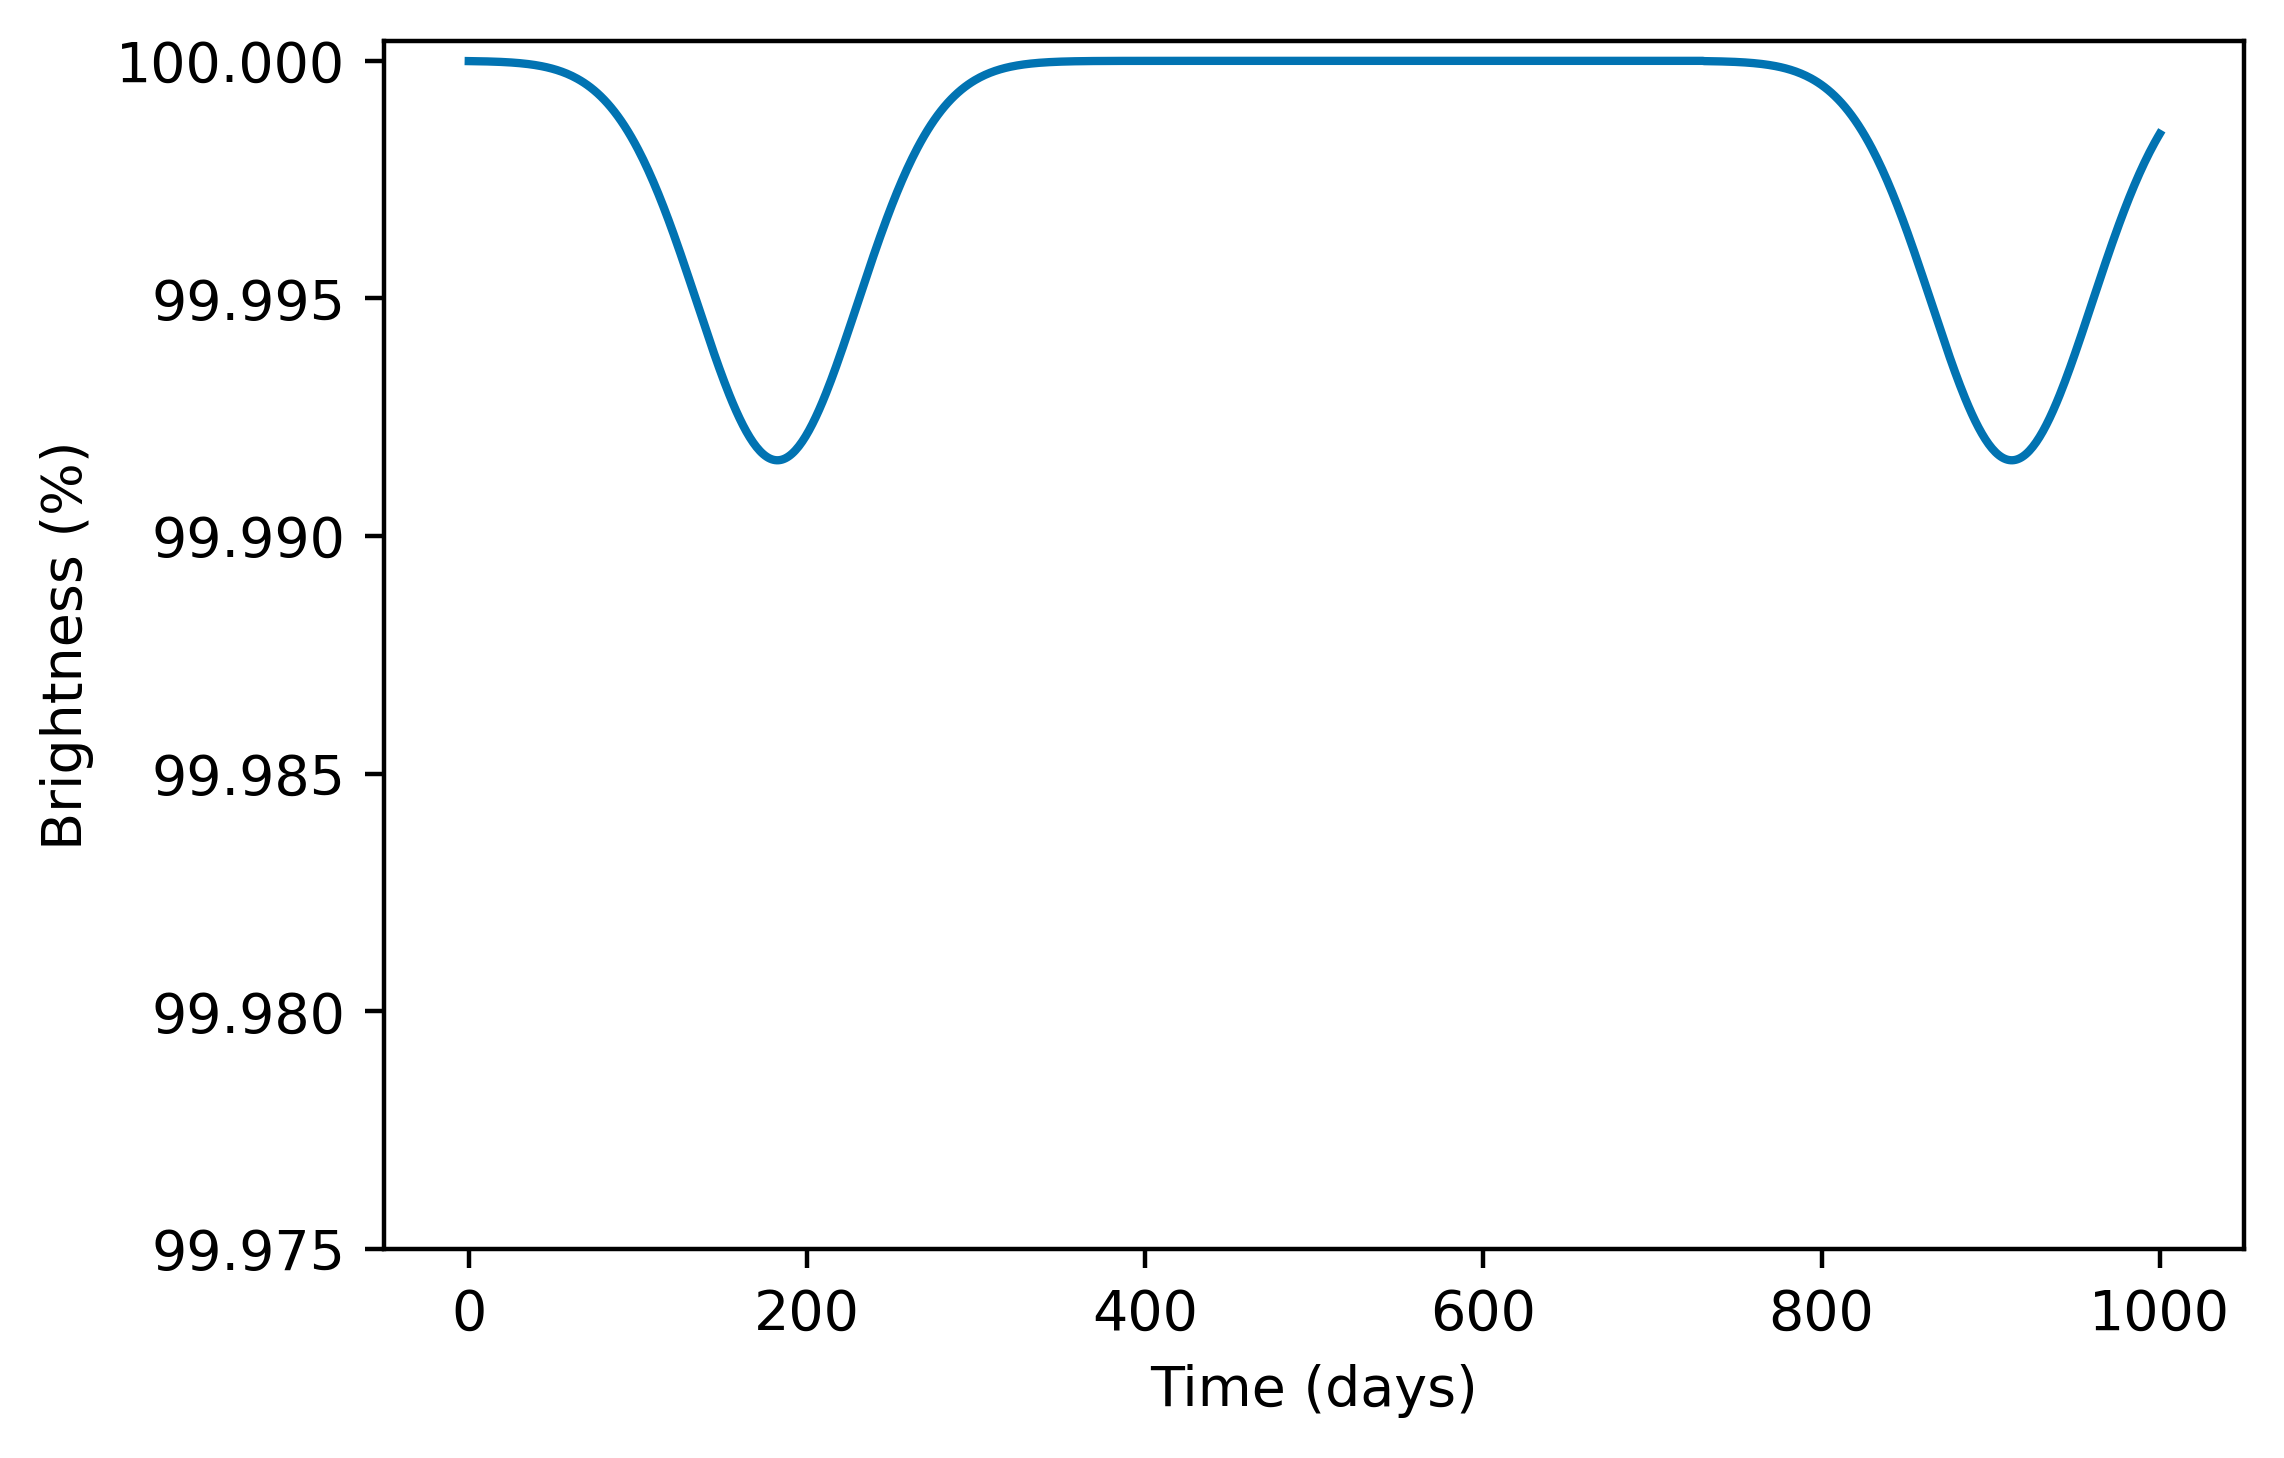

In [30]:
fake_transit_plot(1000., 10.*earth_sun_radius_ratio, 365., ymin=99.975)